# Unleashing Insights from Football Data Using Multiple Tools

## Importing Required Python Libraries

In [2998]:
import numpy as np 
import pandas as pd 
import statistics as st
import scipy.stats as sts
from scipy.stats import t
from scipy.stats import kurtosis
from scipy.stats import norm #probability distribution function
import math
from datetime import datetime
from datetime import date
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt 
from tabulate import tabulate #to print table
from matplotlib import pyplot
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Sprint 1- Data Preprocessing

#### 1. Reading data files and storing into a dataframe

In [3001]:
# Reading data from existing .xlsx file using read_excel() of pandas module and storing into a dataframe
appearances = pd.read_excel("D:/Documents/NIIT/Capstone Project/appearances.xlsx")
game_events = pd.read_excel("D:/Documents/NIIT/Capstone Project/game_events.xlsx")
game_lineups = pd.read_excel("D:/Documents/NIIT/Capstone Project/game_lineups.xlsx")
games = pd.read_excel("D:/Documents/NIIT/Capstone Project/games.xlsx")
players = pd.read_excel("D:/Documents/NIIT/Capstone Project/players.xlsx")

#### 2. Merging data files and dropping redundant columns

In [3003]:
# Merge appearances with game_events
merged_data = pd.merge(appearances, games, on='game_id', how='inner')

# Merge game_lineups with merged_data
merged_data = pd.merge(merged_data, game_events, on='game_id', how='inner')

# Rename column player_id_x to player_id
merged_data.rename(columns={'player_id_x': 'player_id'}, inplace=True)

# Merge players with merged_data
merged_data = pd.merge(merged_data, players, on='player_id', how='inner')

# Merge games with merged_data
merged_data = pd.merge(merged_data, game_lineups, on='player_id', how='inner')

# Understanding merged_data
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 59 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   appearance_id                4199 non-null   object        
 1   game_id_x                    4199 non-null   int64         
 2   player_id                    4199 non-null   int64         
 3   date_x                       4199 non-null   datetime64[ns]
 4   player_name_x                4199 non-null   object        
 5   competition_id_x             4199 non-null   object        
 6   yellow_cards                 4199 non-null   int64         
 7   red_cards                    4199 non-null   int64         
 8   goals                        4199 non-null   int64         
 9   assists                      4199 non-null   int64         
 10  minutes_played               4199 non-null   int64         
 11  competition_id_y             4199 non-null 

In [3004]:
# Remove redundant columns from the merged_data
merged_data = merged_data.drop(['player_assist_id', 'description', 'home_club_formation', 'away_club_formation', 'agent_name','competition_id_y', 'game_id_y', 'player_id_y', 'date_x', 'date_y', 'player_name_x', 'player_in_id', 'name'], axis=1)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   appearance_id                4199 non-null   object        
 1   game_id_x                    4199 non-null   int64         
 2   player_id                    4199 non-null   int64         
 3   competition_id_x             4199 non-null   object        
 4   yellow_cards                 4199 non-null   int64         
 5   red_cards                    4199 non-null   int64         
 6   goals                        4199 non-null   int64         
 7   assists                      4199 non-null   int64         
 8   minutes_played               4199 non-null   int64         
 9   season                       4199 non-null   int64         
 10  round                        4199 non-null   object        
 11  home_club_goals              4199 non-null 

#### 3. Missing value treatment

In [3006]:
# Check for missing values in each column
missing_values = merged_data.isnull().sum()
print('Missing values in each column:\n', missing_values)

Missing values in each column:
 appearance_id                    0
game_id_x                        0
player_id                        0
competition_id_x                 0
yellow_cards                     0
red_cards                        0
goals                            0
assists                          0
minutes_played                   0
season                           0
round                            0
home_club_goals                  0
away_club_goals                  0
home_club_position             718
away_club_position             718
home_club_manager_name           0
away_club_manager_name           0
stadium                          0
attendance                     396
referee                         32
home_club_name                 209
away_club_name                  22
aggregate                        0
competition_type                 0
game_event_id                    0
date                             0
minute                           0
type_x                 

In [3008]:
#Separate the columns into categorical and numerical data types and display them
def separate_columns(df):
    cat_cols = []
    num_cols = []
    
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].dtype == 'datetime64[ns]':
            cat_cols.append(col)
        else:
            num_cols.append(col)
    return cat_cols, num_cols

cat_cols, num_cols = separate_columns(merged_data)

table = [cat_cols, num_cols]
print(tabulate({'Categorical': cat_cols, 'Numerical': num_cols}, headers = ['Categorical columns:', 'Numerical columns:']))

Categorical columns:      Numerical columns:
------------------------  ---------------------------
appearance_id             game_id_x
competition_id_x          player_id
round                     yellow_cards
home_club_manager_name    red_cards
away_club_manager_name    goals
stadium                   assists
referee                   minutes_played
home_club_name            season
away_club_name            home_club_goals
aggregate                 away_club_goals
competition_type          home_club_position
game_event_id             away_club_position
date                      attendance
type_x                    minute
player_code               last_season
country_of_birth          current_club_id
date_of_birth             height_in_cm
sub_position              market_value_in_eur
position_x                highest_market_value_in_eur
foot                      number
contract_expiration_date  team_captain
game_lineups_id
type_y
player_name_y
position_y


In [3009]:
# Treating missing values in categorical columns
categorical_cols = merged_data.select_dtypes(include=['object', 'datetime64[ns]']).columns
merged_data[categorical_cols] = merged_data[categorical_cols].apply(lambda x: x.fillna(x.value_counts().index[0]))

In [3010]:
# Treating missing values in numerical columns
numerical_cols = merged_data.select_dtypes(include=['float64', 'int64']).columns
merged_data[numerical_cols] = merged_data[numerical_cols].fillna(merged_data[numerical_cols].mean())

In [3011]:
# Checking missing values in each column after treatment
missing_values = merged_data.isnull().sum()
print('Missing values in each column:\n', missing_values)

Missing values in each column:
 appearance_id                  0
game_id_x                      0
player_id                      0
competition_id_x               0
yellow_cards                   0
red_cards                      0
goals                          0
assists                        0
minutes_played                 0
season                         0
round                          0
home_club_goals                0
away_club_goals                0
home_club_position             0
away_club_position             0
home_club_manager_name         0
away_club_manager_name         0
stadium                        0
attendance                     0
referee                        0
home_club_name                 0
away_club_name                 0
aggregate                      0
competition_type               0
game_event_id                  0
date                           0
minute                         0
type_x                         0
last_season                    0
current_clu

Interpretation- There are no missing values in the dataset after treatment.

In [3013]:
# Understanding the cleaned data set
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   appearance_id                4199 non-null   object        
 1   game_id_x                    4199 non-null   int64         
 2   player_id                    4199 non-null   int64         
 3   competition_id_x             4199 non-null   object        
 4   yellow_cards                 4199 non-null   int64         
 5   red_cards                    4199 non-null   int64         
 6   goals                        4199 non-null   int64         
 7   assists                      4199 non-null   int64         
 8   minutes_played               4199 non-null   int64         
 9   season                       4199 non-null   int64         
 10  round                        4199 non-null   object        
 11  home_club_goals              4199 non-null 

#### 4. Saving the cleaned file and creating  data dictionary for it

In [3015]:
# Save the cleaned file as 'Football_data_merged_cleaned.csv' file on local device for future use
#merged_data.to_csv('Football_data_merged_cleaned.csv', index=False)

In [3016]:
# Create a data dictionary for cleaned data using GenAl tools such as ChatGPT/Gemini-
data_dict = pd.DataFrame({
    "Column Name": [
        "appearance_id", "game_id_x", "player_id", "competition_id_x", "yellow_cards", "red_cards", "goals", 
        "assists", "minutes_played", "season", "round", "home_club_goals", "away_club_goals", 
        "home_club_position", "away_club_position", "home_club_manager_name", "away_club_manager_name", 
        "stadium", "attendance", "referee", "home_club_name", "away_club_name", "aggregate", 
        "competition_type", "game_event_id", "date", "minute", "type_x", "name", "last_season", 
        "current_club_id", "player_code", "country_of_birth", "date_of_birth", "sub_position", "position_x", 
        "foot", "height_in_cm", "market_value_in_eur", "highest_market_value_in_eur", "contract_expiration_date", 
        "game_lineups_id", "type_y", "number", "player_name_y", "team_captain", "position_y"
    ],
    "Data Type": [
        "object", "int64", "int64", "object", "int64", "int64", "int64", "int64", "int64", "int64", "object", 
        "int64", "int64", "float64", "float64", "object", "object", "object", "float64", "object", "object", "object", 
        "object", "object", "object", "datetime64[ns]", "int64", "object", "object", "int64", "int64", "object", 
        "object", "datetime64[ns]", "object", "object", "object", "float64", "float64", "float64", 
        "datetime64[ns]", "object", "object", "int64", "object", "int64", "object"
    ],
    "Description": [
        "Unique identifier for a player's appearance in a game.",
        "Unique identifier for the game.",
        "Unique identifier for the player.",
        "Identifier for the competition in which the game is played.",
        "Number of yellow cards received by the player in the game.",
        "Number of red cards received by the player in the game.",
        "Number of goals scored by the player in the game.",
        "Number of assists made by the player in the game.",
        "Total minutes the player was on the field during the game.",
        "Season during which the game was played.",
        "Round or stage of the competition.",
        "Goals scored by the home club in the game.",
        "Goals scored by the away club in the game.",
        "League position of the home club at the time of the game. May contain missing values.",
        "League position of the away club at the time of the game. May contain missing values.",
        "Name of the home club's manager.",
        "Name of the away club's manager.",
        "Name of the stadium where the game was played.",
        "Attendance for the game. May contain missing values.",
        "Name of the referee officiating the game. May contain missing values.",
        "Name of the home club. May contain missing values.",
        "Name of the away club. May contain missing values.",
        "Aggregate score or result for the game.",
        "Type of competition (e.g., league, cup).",
        "Unique identifier for a game event.",
        "Date of the game.",
        "Minute of the game when an event occurred.",
        "Type of event (e.g., goal, card).",
        "Name of the player or manager associated with the event.",
        "Indicates the previous season for the player.",
        "Identifier for the player's current club.",
        "Unique code for the player.",
        "Player's country of birth.",
        "Player's date of birth.",
        "Specific playing position of the player.",
        "General playing position of the player (e.g., forward, midfielder).",
        "Dominant foot of the player (e.g., right, left).",
        "Height of the player in centimeters.",
        "Current market value of the player in Euros. May contain missing values.",
        "Highest recorded market value of the player in Euros.",
        "Date when the player's contract expires. May contain missing values.",
        "Unique identifier for game lineups.",
        "Secondary type of event or categorization.",
        "Player's shirt number.",
        "Name of the player.",
        "Binary flag indicating if the player was the team captain (1 = Yes, 0 = No).",
        "General playing position of the player (duplicate or alternative format)."
    ]
})

print(tabulate(data_dict, headers='keys', tablefmt='grid'))

+----+-----------------------------+----------------+---------------------------------------------------------------------------------------+
|    | Column Name                 | Data Type      | Description                                                                           |
+====+=============================+================+=======================================================================================+
|  0 | appearance_id               | object         | Unique identifier for a player's appearance in a game.                                |
+----+-----------------------------+----------------+---------------------------------------------------------------------------------------+
|  1 | game_id_x                   | int64          | Unique identifier for the game.                                                       |
+----+-----------------------------+----------------+---------------------------------------------------------------------------------------+
|  2 |

## Sprint 2- Generating Business Objectives and Questions

#### Focus Areas, Business Objectives, and Business Questions-

1. Performance Analysis-
   1. Business Objectives:
      1. Evaluate and analyze player performance based on various metrics such as goals, assists, yellow cards, red cards, and minutes played.
      2. Assess team performance in terms of home and away goals, club positions, and manager influence.
   2. Business Questions:
       1. Which players have the highest goal and assist contributions this season?
       2. How do yellow and red cards correlate with player performance?
       3. What is the impact of home and away performance on overall team success?
       4. How does manager experience and decision-making influence team outcomes?
*
2. Player Profile and Market Value-
   1. Business Objectives:
      1. Identify key factors influencing player market value, such as performance, position, and age.
      2. Track player development trends to predict future market values.
   2. Business Questions:
      1. What attributes contribute most to a player's market value?
      2. How does a player's position and age impact their current and future market value?
      3. Which players show the greatest potential for value appreciation?
      4. How does injury history affect market value trends?
*
3. Team Comparison-
   1. Business Objectives:
      1. Compare team performance across various competitions and seasons.
      2. Identify strengths and weaknesses of teams relative to competitors.
   2. Business Questions:
      1. Which teams have the best offensive and defensive records?
      2. How do teams perform in league versus cup competitions?
      3. Which teams have the most consistent performance trends over multiple seasons?
      4. How does squad depth affect team success in different competitions?
*
4. Attendance and Stadium Analysis-
   1. Business Objectives:
      1. Analyze factors influencing game attendance, such as stadium location, team performance, and competition type.
      2. Assess the impact of attendance on club revenue and fan engagement.
   2. Business Questions:
      1. Which stadiums have the highest and lowest average attendance?
      2. How does team performance influence attendance figures?
      3. What are the key factors driving attendance variations across competitions?
      4. How does attendance correlate with revenue generation?
*
5. Referee Analysis-
   1. Business Objectives:
      1. Evaluate referee performance based on decisions such as fouls, cards, and penalties awarded.
      2. Assess the impact of referee decisions on game outcomes.
   2. Business Questions:
      1. Which referees have the highest accuracy in decision-making?
      2. How do referee decisions influence team performance and outcomes?
      3. Are certain referees more likely to award penalties or cards?
      4. How does referee experience correlate with game management?
*
6. Substitution Patterns-
   1. Business Objectives:
      1. Analyze substitution patterns to understand tactical decision-making.
      2. Evaluate the impact of substitutions on game outcomes and player performance.
   2. Business Questions:
      1. What are the most common substitution patterns across teams?
      2. How do substitutions influence the momentum and outcome of games?
      3. Which players are most frequently substituted, and why?
      4. How do injury and fatigue factors influence substitution decisions?
*
7. Event Analysis-
   1. Business Objectives:
      1. Analyze key game events such as goals, cards, and substitutions to identify patterns.
      2. Assess the timing and frequency of critical events in games.
   2. Business Questions:
      1. At what stages of the game are goals most frequently scored?
      2. What are the patterns of yellow and red cards over the course of a game?
      3. How do game events vary between high-stakes and low-stakes matches?
      4. What is the impact of early events (e.g., early goals or red cards) on final outcomes?
*
8. Competition Analysis-
    1. Business Objectives:
       1. Compare competition formats and their impact on team and player performance.
       2. Identify trends in competition outcomes over multiple seasons.
    2. Business Questions:
       1. How does performance vary between league and knockout competitions?
       2. Which teams perform consistently well across different competition formats?
       3. What are the trends in championship-winning teams over the years?
       4. How does fixture congestion influence team performance in competitions?
*
9. Player Attributes and Demographics-
    1. Business Objectives:
       1. Examine the role of player demographics (age, nationality, height, etc.) in performance and market value.
       2. Identify trends in player development and positional attributes.
    2. Business Questions:
       1. How do age and experience influence player performance and longevity?
       2. Which nationalities are most represented in top-performing teams?
       3. How do physical attributes (e.g., height, dominant foot) affect player roles and success?
       4. What are the emerging trends in youth player development?
*
10. Contract Management-
    1. Business Objectives:
       1. Analyze the impact of contract length and expiration on player performance and transfer activity.
       2. Assess trends in contract renewals and terminations.
    2. Business Questions:
       1. How does contract length influence player performance?
       2. What are the trends in contract renewals for top-performing players?
       3. How do clubs manage expiring contracts to maximize value?
       4. What is the correlation between contract terms and transfer market activity?

## Sprint 3- Solving Business Questions- Performance Analysis

#### 1. Players having the highest goal and assist contributions of all time

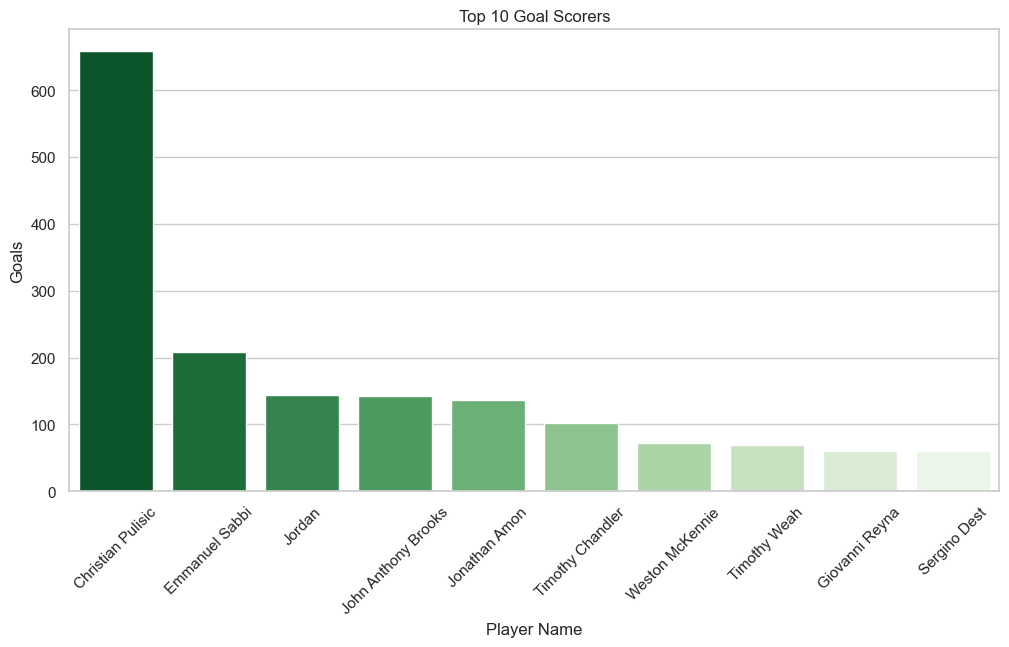

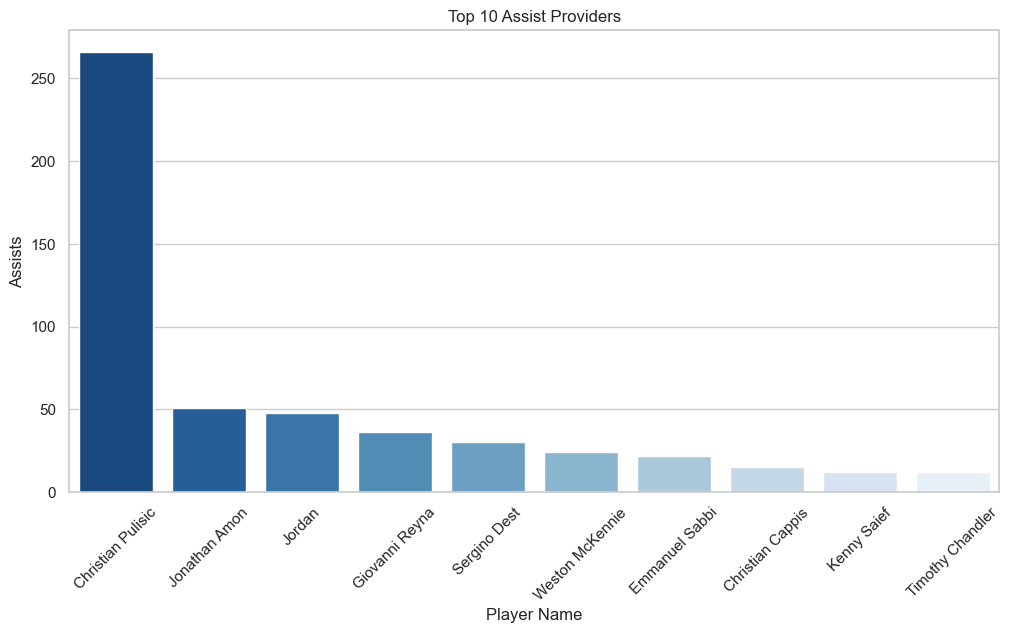

In [3021]:
# Group by player_id and sum goals
goals_grouped_data = merged_data.groupby('player_name_y').agg({'goals': 'sum'})

# Sort by goals in descending order
goals_sorted_data = goals_grouped_data.sort_values(by=['goals'], ascending=False)

# Group by player_id and sum assists
assists_grouped_data = merged_data.groupby('player_name_y').agg({'assists': 'sum'})

# Sort by assists in descending order
assists_sorted_data = assists_grouped_data.sort_values(by=['assists'], ascending=False)

# Get the top 10 players for each category
top_10_scorers = goals_sorted_data.head(10)
top_10_assists = assists_sorted_data.head(10)

# Create a custom green color palette
green_palette = sns.color_palette("Greens", n_colors=len(top_10_scorers))

# Invert the palette by indexing in reverse order
inverted_green_palette = green_palette[::-1]

# Create a bar plot for goals
plt.figure(figsize=(12, 6))
sns.barplot(x='player_name_y', y='goals', data=top_10_scorers, palette=inverted_green_palette)
plt.title('Top 10 Goal Scorers')
plt.xlabel('Player Name')
plt.ylabel('Goals')
plt.xticks(rotation=45)
#plt.savefig('top_scorers_green.png')  # Save the plot
plt.show()

# Create a custom blue color palette
blue_palette = sns.color_palette("Blues", n_colors=len(top_10_assists))

# Invert the palette by indexing in reverse order
inverted_blue_palette = blue_palette[::-1]

# Create a bar plot for assists
plt.figure(figsize=(12, 6))
sns.barplot(x='player_name_y', y='assists', data=top_10_assists, palette=inverted_blue_palette)
plt.title('Top 10 Assist Providers')
plt.xlabel('Player Name')
plt.ylabel('Assists')
plt.xticks(rotation=45)
#plt.savefig('top_assists_gradient.png')  # Save the plot
plt.show()

Interpretation- The highest number of goals and assists are scored by Christian Pulisic with 658 goals and 266 assists.

#### 2. Correlation Matrix of Performance Metrics with Goals vs. Yellow Cards and Assists vs. Red Cards

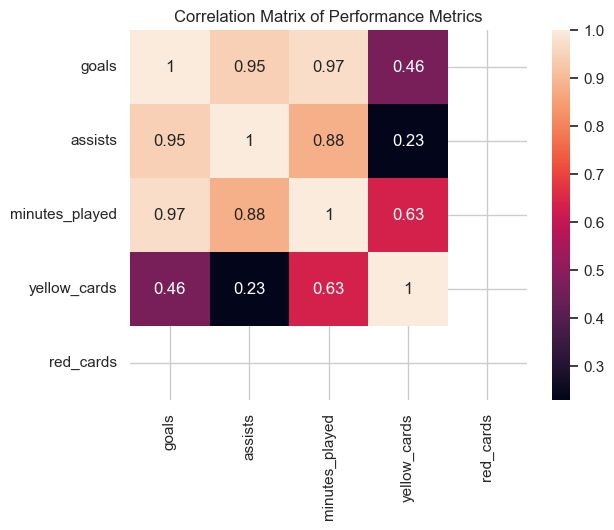

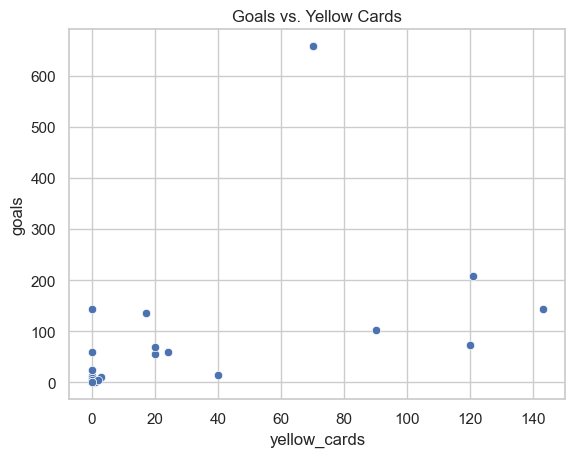

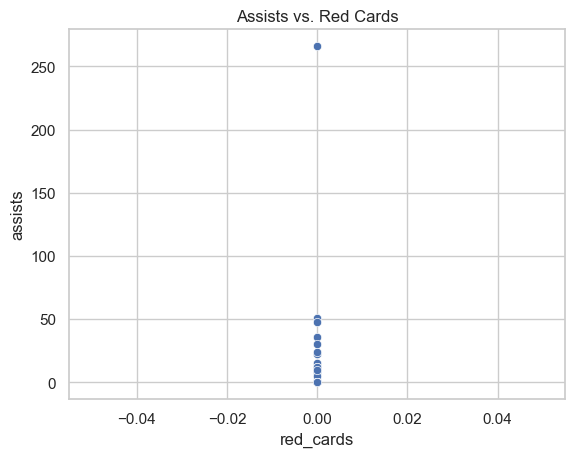

In [3024]:
# Group by player and calculate total cards
grouped_data = merged_data.groupby('player_name_y').agg({'goals': 'sum', 'assists': 'sum', 'minutes_played': 'sum', 'yellow_cards': 'sum', 'red_cards': 'sum'})

# Correlation matrix
corr_matrix = grouped_data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix of Performance Metrics')
plt.show()

# Scatter plot: Goals vs. Yellow Cards
sns.scatterplot(x='yellow_cards', y='goals', data=grouped_data)
plt.title('Goals vs. Yellow Cards')
plt.show()

# Scatter plot: Assists vs. Red Cards
sns.scatterplot(x='red_cards', y='assists', data=grouped_data)
plt.title('Assists vs. Red Cards')
plt.show()

Interpretation- Number of minutes_played and assists have very high correlation with goals scored.

#### 3. Count of red and yellow cards shown in every season

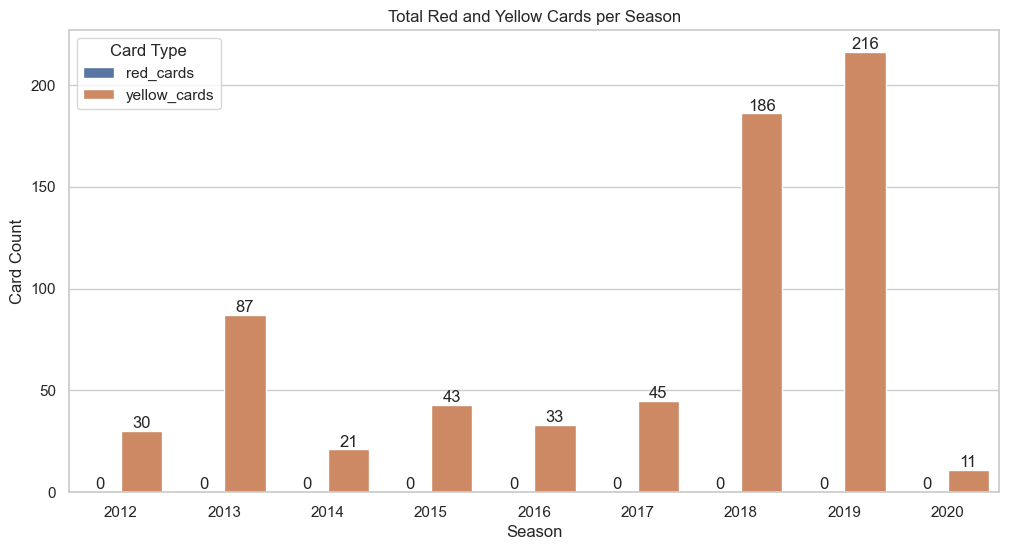

In [3027]:
# Group data by season and sum red and yellow cards
grouped_data = merged_data.groupby('season')[['red_cards', 'yellow_cards']].sum().reset_index()

# Create a clustered bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='season', y='value', hue='variable', data=grouped_data.melt(id_vars='season', var_name='variable', value_name='value'))

# Add bar labels
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), ha='center', va='bottom')

plt.title('Total Red and Yellow Cards per Season')
plt.xlabel('Season')
plt.ylabel('Card Count')
plt.legend(title='Card Type')
#plt.savefig('total_cards.png')  # Save the plot
plt.show()

Interpretation- Highest number of yellow_cards were shown in 2019 (216 yellow_cards) and 2018 seasons. No red_cards were shown in any season.

#### 4. Impact of home and away performance on overall team success of the top teams in 2020

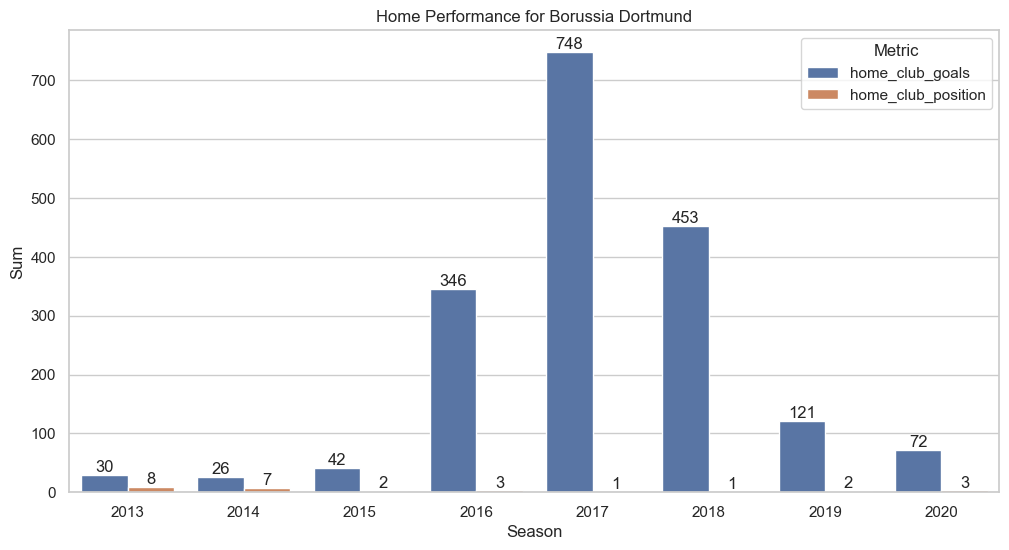

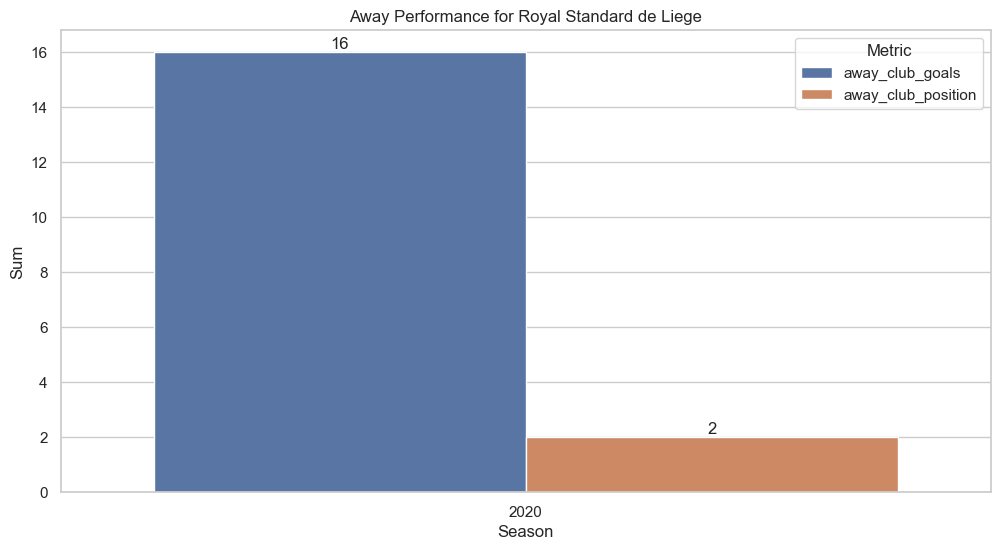

In [3030]:
# Find the top home club in 2020
top_homeclub_2020 = merged_data[merged_data['season'] == 2020].sort_values('home_club_position').head(1)['home_club_name'].values[0]

# Filter data for the top home club
top_homeclub_data = merged_data[merged_data['home_club_name'] == top_homeclub_2020]

# Group data by season and calculate sums and minimum position
grouped_data = top_homeclub_data.groupby('season').agg({'home_club_goals': 'sum', 'home_club_position': 'min'}).reset_index()

# Melt the DataFrame for seaborn
melted_data = grouped_data.melt(id_vars='season', var_name='variable', value_name='value')

# Create the clustered bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='season', y='value', hue='variable', data=melted_data)

# Add bar labels
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), ha='center', va='bottom')

plt.title(f'Home Performance for {top_homeclub_2020}')
plt.xlabel('Season')
plt.ylabel('Sum')
plt.legend(title='Metric')
plt.show()

# Find the top away club in 2020
top_awayclub_2020 = merged_data[merged_data['season'] == 2020].sort_values('away_club_position').head(1)['away_club_name'].values[0]

# Filter data for the top away club
top_awayclub_data = merged_data[merged_data['away_club_name'] == top_awayclub_2020]

# Group data by season and calculate sums and minimum position
grouped_data = top_awayclub_data.groupby('season').agg({'away_club_goals': 'sum', 'away_club_position': 'min'}).reset_index()

# Melt the DataFrame for seaborn
melted_data = grouped_data.melt(id_vars='season', var_name='variable', value_name='value')

# Create the clustered bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='season', y='value', hue='variable', data=melted_data)

# Add bar labels
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), ha='center', va='bottom')

plt.title(f'Away Performance for {top_awayclub_2020}')
plt.xlabel('Season')
plt.ylabel('Sum')
plt.legend(title='Metric')
plt.show()

Interpretation- Top team in home performance is Borussia Dortmund which shows the higher the total number of goals scored per season, the better the final finishing position of the club. Top team in away performance is Royal Standard de Liege.

#### 5. Outlier Assessment and Treatment

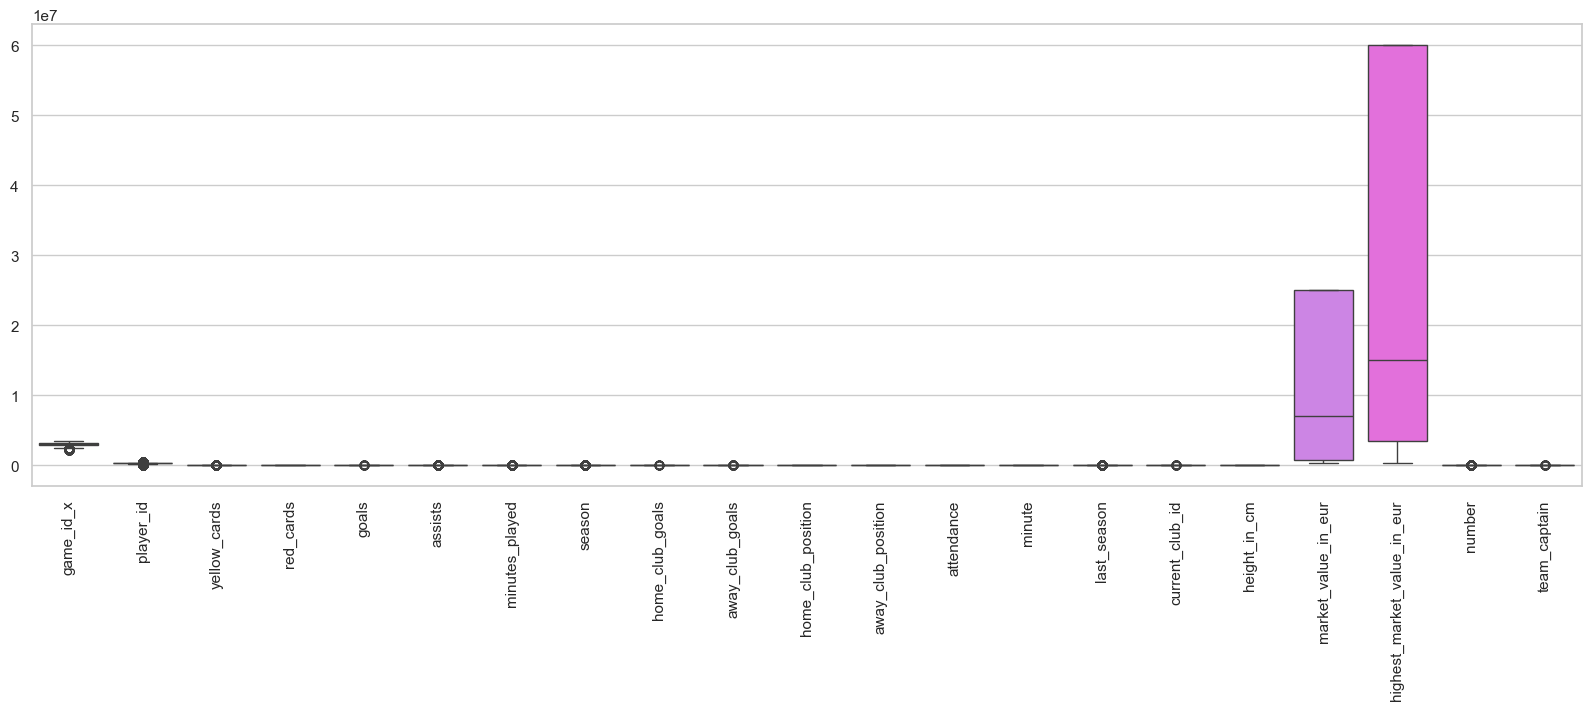

In [3033]:
# Outlier Assessment
merged_data_copy = merged_data.copy()
sns.boxplot(data=merged_data_copy)  # All columns by default
plt.gcf().set_size_inches(20, 6)
plt.xticks(rotation=90)
#plt.savefig('merged_data_outlier_assessment.png')  # Save the plot
plt.show()

Interpretation- Data exists with outliers.

In [3035]:
# Outlier Treatment
def iqr_winsorization(df, thresh=1.5):
    df_numeric = df.select_dtypes(include=[np.number])  # Select numeric columns
    columns_to_treat = df_numeric.columns

    for col in columns_to_treat:
        Q1 = df_numeric[col].quantile(0.25)
        Q3 = df_numeric[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define fences
        lower_fence = Q1 - thresh * IQR
        upper_fence = Q3 + thresh * IQR

        # Winsorize outliers
        df_numeric.loc[df_numeric[col] < lower_fence, col] = lower_fence
        df_numeric.loc[df_numeric[col] > upper_fence, col] = upper_fence

    return df_numeric

df = pd.DataFrame(merged_data_copy)
# Perform outlier treatment on all columns
mergedcp_treated_df = iqr_winsorization(df.copy())
print(mergedcp_treated_df)

      game_id_x  player_id  yellow_cards  red_cards  goals  assists  \
0     2356315.5   213183.5             0          0    0.0        0   
1     2356315.5   213183.5             0          0    0.0        0   
2     2356315.5   213183.5             0          0    0.0        0   
3     2356315.5   213183.5             0          0    0.0        0   
4     2356315.5   213183.5             0          0    0.0        0   
...         ...        ...           ...        ...    ...      ...   
4194  3415291.0   465443.5             0          0    1.0        0   
4195  3415291.0   465443.5             0          0    1.0        0   
4196  3415291.0   465443.5             0          0    1.0        0   
4197  3415291.0   465443.5             0          0    1.0        0   
4198  3415291.0   465443.5             0          0    1.0        0   

      minutes_played  season  home_club_goals  away_club_goals  ...  \
0               70.0    2014                1                2  ...   
1    

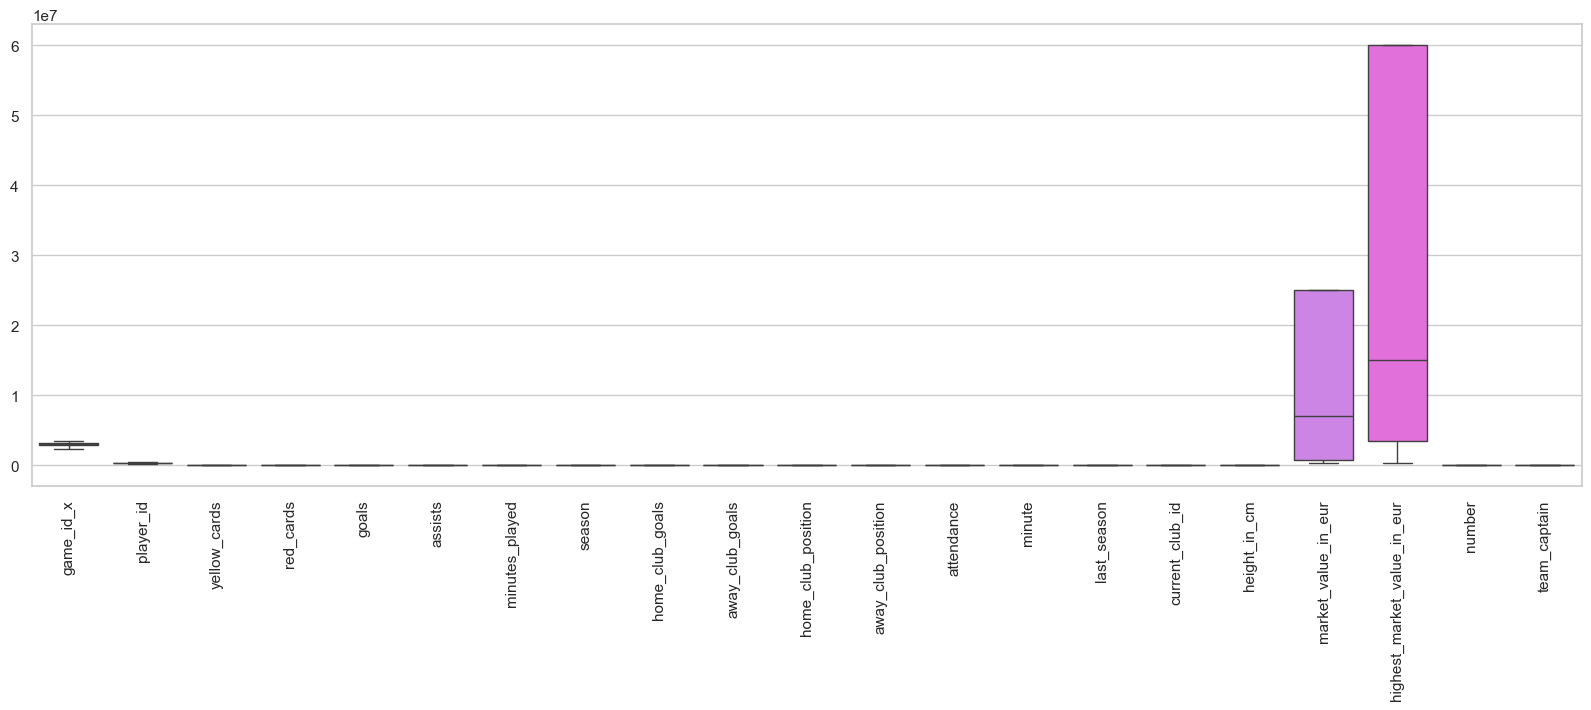

In [3036]:
# Outlier Assessment after Outlier Treatment
sns.boxplot(data=mergedcp_treated_df)  # All columns by default
plt.gcf().set_size_inches(20, 6)
plt.xticks(rotation=90)
plt.show()

Interpretation- No outliers exist in the dataset post outlier treatment.

#### 6. Checking Central Tendency, Normal Distribution and Central Limit Theorem

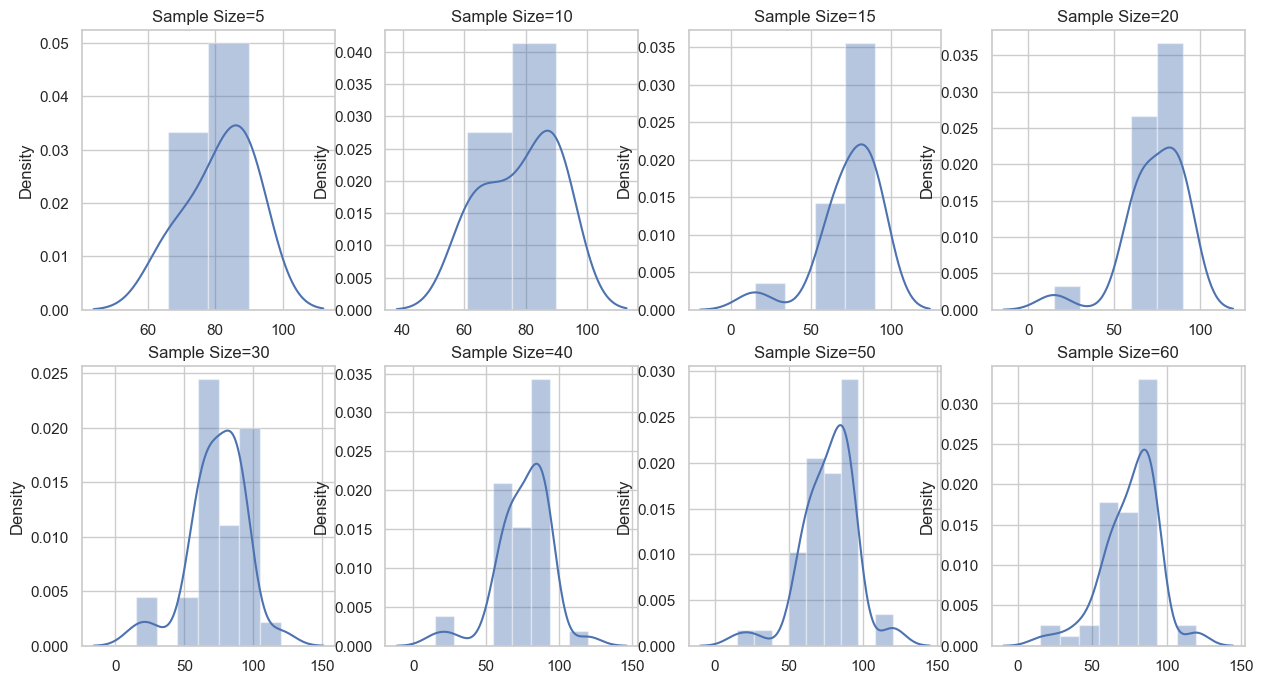

In [3039]:
# Distribution of samples of different sizes
num = [5,10,15,20,30,40,50,60]
data_s = []
sample_df = pd.DataFrame()

fig,ax = plt.subplots(2, 4, figsize=(15,8))
for i in num:
    sample_df = mergedcp_treated_df.sample(n=i, random_state=1, replace=True)
    data_s.append(sample_df['minutes_played'].tolist())

k=0
for i in range(0,2):
    for j in range(0,4):
        sns.distplot(data_s[k], ax=ax[i,j])
        ax[i,j].set_title(label = 'Sample Size='+str(len(data_s[k])))
        k+=1

#plt.savefig('normal_dist.png')  # Save the plot
plt.show()

Interpretation- Samples with a size of 30 or larger exhibit a clear trend towards a normal distribution.

In [3041]:
# Extract sample data using Simple Random Sampling without Replacement
sample1_df = mergedcp_treated_df.sample(n=200, random_state=1)
sample1_df

,game_id_x,player_id,yellow_cards,red_cards,goals,assists,minutes_played,season,home_club_goals,away_club_goals,...,away_club_position,attendance,minute,last_season,current_club_id,height_in_cm,market_value_in_eur,highest_market_value_in_eur,number,team_captain
3600,3203608.0,332697.0,0,0,0.0,0,90.0,2019,0,0,...,6.000000,47863.0,90.0,2023,506,185.0,20000000.0,25000000.0,16.0,0
781,2732231.0,213183.5,0,0,0.0,0,45.0,2016,0,0,...,6.000000,7132.0,46.0,2023,58,176.0,700000.0,3500000.0,5.0,0
2165,3063659.0,381187.0,0,0,0.0,0,75.0,2018,2,0,...,14.000000,4719.0,75.0,2023,738,178.0,800000.0,1000000.0,38.5,0
1217,2929499.0,381187.0,0,0,0.0,0,69.0,2017,5,4,...,9.202815,1013.0,69.0,2023,738,178.0,800000.0,1000000.0,38.5,0
1006,2850642.0,315779.0,0,0,0.0,0,45.0,2016,1,2,...,9.202815,74322.0,72.0,2023,5,177.0,25000000.0,60000000.0,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,2460775.0,213183.5,0,0,0.0,0,90.0,2014,0,5,...,7.000000,39604.0,23.0,2023,533,194.0,2000000.0,15000000.0,23.0,0
58,2356315.5,213183.5,0,0,0.0,0,84.0,2014,3,0,...,5.000000,46055.0,84.0,2023,24,186.0,700000.0,5000000.0,22.0,0
3591,3203608.0,332697.0,0,0,0.0,0,90.0,2019,0,0,...,6.000000,47863.0,90.0,2023,506,185.0,20000000.0,25000000.0,16.0,0
929,2704582.0,213183.5,0,0,1.0,0,90.0,2016,4,2,...,5.000000,49500.0,69.0,2023,533,194.0,2000000.0,15000000.0,23.0,0


In [3042]:
# Central tendency and dispersion for the sampled data with size 200
data_s = sample1_df['minutes_played'].tolist()
s_mean = st.mean(data_s)
s_median = st.median(data_s)
s_sd = st.stdev(data_s)

print('Sample Statistics:')
print('Mean= ' +str(s_mean))
print('Median= ' +str(s_median))
print('SD= ' +str(s_sd))
print('Skewness= ' +str(sts.skew(data_s, bias=False)))
print('Kurtosis= ' +str(sts.kurtosis(data_s, bias=False)))

Sample Statistics:
Mean= 70.49
Median= 78.0
SD= 21.757050494751255
Skewness= -1.2474868736731886
Kurtosis= 0.7052433288549733


In [3043]:
# Central tendency and dispersion for the population data
data_p = mergedcp_treated_df['minutes_played'].tolist()
p_mean = st.mean(data_p)
p_median = st.median(data_p)
p_sd = st.stdev(data_p)

print('Population Statistics:')
print('Mean= ' +str(p_mean))
print('Median= ' +str(p_median))
print('SD= ' +str(p_sd))
print('Skewness= ' +str(sts.skew(data_p, bias=False)))
print('Kurtosis= ' +str(sts.kurtosis(data_p, bias=False)))

Population Statistics:
Mean= 69.89318885448917
Median= 77.0
SD= 22.266553200367202
Skewness= -1.0204697003983672
Kurtosis= 0.4229930570390539


In [3044]:
samples1_df = pd.DataFrame()
for i in range(0,200):
    samples1_df['Sample_'+str(i)] = mergedcp_treated_df['minutes_played'].sample(n=20, replace=True).reset_index(drop=True)

In [3045]:
# Calculating mean for 200 samples
sample1_mean = []
sample1_name = samples1_df.columns

for i in sample1_name:
    sample1_mean.append(samples1_df[i].mean())

samples1_mean = pd.DataFrame()
samples1_mean.insert(0, 'sample name', sample1_name)
samples1_mean.insert(1, 'sample mean', sample1_mean)
print(samples1_mean)

    sample name  sample mean
0      Sample_0       75.650
1      Sample_1       74.175
2      Sample_2       62.450
3      Sample_3       60.950
4      Sample_4       65.450
..          ...          ...
195  Sample_195       70.075
196  Sample_196       66.525
197  Sample_197       80.450
198  Sample_198       71.350
199  Sample_199       72.850

[200 rows x 2 columns]


In [3046]:
# Calculating SD for 200 samples' mean
sample1_mean_sd = st.stdev(samples1_mean['sample mean'])
print('Calculated Samples Mean Standard Deviation= ' +str(sample1_mean_sd))

Calculated Samples Mean Standard Deviation= 5.100978303055327


In [3047]:
# Calculating SD from the population parameter
calculated1_sd = p_sd/math.sqrt(40)
print('Calculated Population Standard Deviation= ' +str(sample1_mean_sd))

Calculated Population Standard Deviation= 5.100978303055327


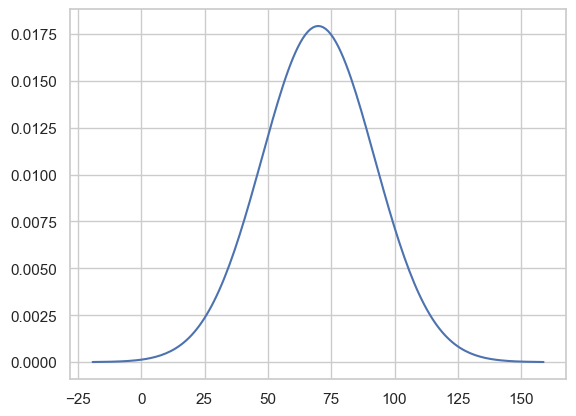

In [3048]:
# Probability Distribution curve of population and sample
lower_p = p_mean-4*p_sd
upper_p = p_mean+4*p_sd
norm_p = np.arange(lower_p, upper_p)
plt.plot(norm_p, norm.pdf(norm_p, p_mean, p_sd))
plt.show()

Interpretation- This observation aligns with the Central Limit Theorem, which states that the distribution of sample means approaches a normal distribution as the sample size increases, regardless of the underlying population distribution.

#### 7. Conditional and Joint Probability

In [3051]:
# Conditional Probability- Probability that a player scores a goal given that they played at least 60 minutes
mergedcp_treated_df['scored_goal'] = mergedcp_treated_df['goals']>0
mergedcp_treated_df['played_60_minutes'] = mergedcp_treated_df['minutes_played'] > 60
prob_scored_played_60_min = mergedcp_treated_df[mergedcp_treated_df['played_60_minutes']]['scored_goal'].mean() 
print(f'Probability that a player scores a goal given that they played at least 60 minutes= {prob_scored_played_60_min:.2f}')

Probability that a player scores a goal given that they played at least 60 minutes= 0.41


In [3052]:
# Joint Probability- Probability that a player provides an assist and scores a goal in the same match
mergedcp_treated_df['give_assist'] = mergedcp_treated_df['assists']>0
jointprob_assist_goal = len(mergedcp_treated_df[(mergedcp_treated_df['scored_goal']) & (mergedcp_treated_df['give_assist'])]) / len(mergedcp_treated_df) 
print(f"Joint probability of a player providing an assist and scoring a goal= {jointprob_assist_goal:.2f}")

Joint probability of a player providing an assist and scoring a goal= 0.00


## Sprint 4- Solving Business Questions- Performance Analysis, Player Profile and Market Value

### 1. Logistic Regression for predicting Attendance

In [3055]:
log1_df = merged_data[['attendance', 'competition_type', 'stadium', 'goals', 'player_name_y', 'season']]
log1_df

,attendance,competition_type,stadium,goals,player_name_y,season
0,45033.0,domestic_league,Max-Morlock-Stadion,0,Timothy Chandler,2012
1,45033.0,domestic_league,Max-Morlock-Stadion,0,Timothy Chandler,2012
2,45033.0,domestic_league,Max-Morlock-Stadion,0,Timothy Chandler,2012
3,45033.0,domestic_league,Max-Morlock-Stadion,0,Timothy Chandler,2012
4,45033.0,domestic_league,Max-Morlock-Stadion,0,Timothy Chandler,2012
...,...,...,...,...,...,...
4194,3200.0,domestic_league,Olympisch Stadion,1,Joseph Efford,2020
4195,3200.0,domestic_league,Olympisch Stadion,1,Joseph Efford,2020
4196,3200.0,domestic_league,Olympisch Stadion,1,Joseph Efford,2020
4197,3200.0,domestic_league,Olympisch Stadion,1,Joseph Efford,2020


#### 1. Label Encoding

In [3057]:
# Encoding competition_type variable 
purpose_encoder = preprocessing.LabelEncoder()
purpose_encoder.fit(log1_df['competition_type'])
print(purpose_encoder.classes_)
log1_df['competition_type.enc'] = purpose_encoder.transform(log1_df['competition_type'])

['domestic_cup' 'domestic_league' 'international_cup' 'other']


In [3058]:
# Encoding stadium variable 
purpose_encoder = preprocessing.LabelEncoder()
purpose_encoder.fit(log1_df['stadium'])
print(purpose_encoder.classes_)
log1_df['stadium.enc'] = purpose_encoder.transform(log1_df['stadium'])

[' Bremer Brucke' 'AFAS Stadion' 'AMEX Stadium' 'Aalborg Portland Park'
 'Allianz Arena' 'Allianz Riviera' 'Anfield'
 'Argosstadion Achter de Kazerne' 'Audi Sportpark' 'BUKO Stadion'
 'BayArena' 'Blue Water Arena' 'Bramall Lane' 'Brondby Stadium'
 'Carrow Road' 'Cegeka Arena' 'Celtic Park' 'Ceres Park'
 'Civitas Metropolitano' 'Commerzbank Arena'
 'Constant Vanden Stock Stadion' 'Craven Cottage' 'DS Arena'
 'Daknamstadion' 'Decathlon Arena-Stade Pierre-Mauroy' 'Diaz Arena'
 'Dreisamstadion' 'Edmund-Plambeck-Stadion' 'Ernst-Abbe-Sportfeld'
 'Erve Asito' 'Etihad Stadium' 'Euroborg' 'Fortuna Sittard Stadion'
 'Freethielstadion' 'Friedrich Ludwig Jahn Sportpark'
 'GP Stadion am Hardtwald' 'Ghelamco Arena' 'Groupama Stadium'
 'Guldensporenstadion' 'Heinz-von-Heiden-Arena' 'Helsingor Stadium'
 'Herfolge stadium' 'Het Kuipje' 'Home Deluxe Arena' 'JYSK Park'
 'Jahnstadion Regensburg' 'Jan-Breydel-Stadion' 'Johan Cruijff ArenA'
 'King Power Stadium' 'Koning Willem II Stadion' 'Le Canonnier'
 'L

In [3059]:
# Encoding player_name_y variable 
purpose_encoder = preprocessing.LabelEncoder()
purpose_encoder.fit(log1_df['player_name_y'])
print(purpose_encoder.classes_)
log1_df['player_name_y.enc'] = purpose_encoder.transform(log1_df['player_name_y'])

['Andrija Novakovich' 'Caleb Stanko' 'Christian Cappis'
 'Christian Pulisic' 'Desevio Payne' 'Emmanuel Sabbi' 'Erik Palmer-Brown'
 'Giovanni Reyna' 'John Anthony Brooks' 'Jonathan Amon' 'Jordan'
 'Joseph Efford' 'Josh Sargent' 'Julian Green' 'Kenny Saief'
 'Luca de la Torre' 'Lynden Gooch' 'Sergino Dest' 'Terrence Boyd'
 'Tim Ream' 'Timothy Chandler' 'Timothy Weah' 'Tyler Adams'
 'Weston McKennie']


In [3060]:
# Define categories (bins) and labels for attendance column
log1_df['attendance_c'] = np.where(log1_df['attendance'] > log1_df['attendance'].median(), 'High attendance', 'Low attendance')
# Print the number of unique values
print(f"Number of unique values: {log1_df['attendance_c'].unique()}")

Number of unique values: ['High attendance' 'Low attendance']


In [3061]:
# Encoding attendance variable
attendance_encoder = preprocessing.LabelEncoder()
attendance_encoder.fit(log1_df['attendance_c'])
print(attendance_encoder.classes_)
log1_df['attendance.enc'] = attendance_encoder.transform(log1_df['attendance_c'])

['High attendance' 'Low attendance']


In [3062]:
# Removing competition_type, stadium, player_name_y, attendance columns from the data
columns_to_drop1 = ["competition_type", "stadium", "player_name_y", "attendance"]
log1_df = log1_df.drop(columns_to_drop1, axis=1)
log1_df

,goals,season,competition_type.enc,stadium.enc,player_name_y.enc,attendance_c,attendance.enc
0,0,2012,1,60,20,High attendance,0
1,0,2012,1,60,20,High attendance,0
2,0,2012,1,60,20,High attendance,0
3,0,2012,1,60,20,High attendance,0
4,0,2012,1,60,20,High attendance,0
...,...,...,...,...,...,...,...
4194,1,2020,1,72,11,Low attendance,1
4195,1,2020,1,72,11,Low attendance,1
4196,1,2020,1,72,11,Low attendance,1
4197,1,2020,1,72,11,Low attendance,1


In [3063]:
# Retrieving attendance.enc column from the dataset and storing into another dataframe
attendance_col_df = pd.DataFrame(log1_df[['attendance.enc']])

# Removing attendance.enc column from the dataset as scaling is not required for this column
new1_df = pd.DataFrame(log1_df.drop(['attendance.enc'], axis=1))

#### 2. Outlier Assessment and Treatment

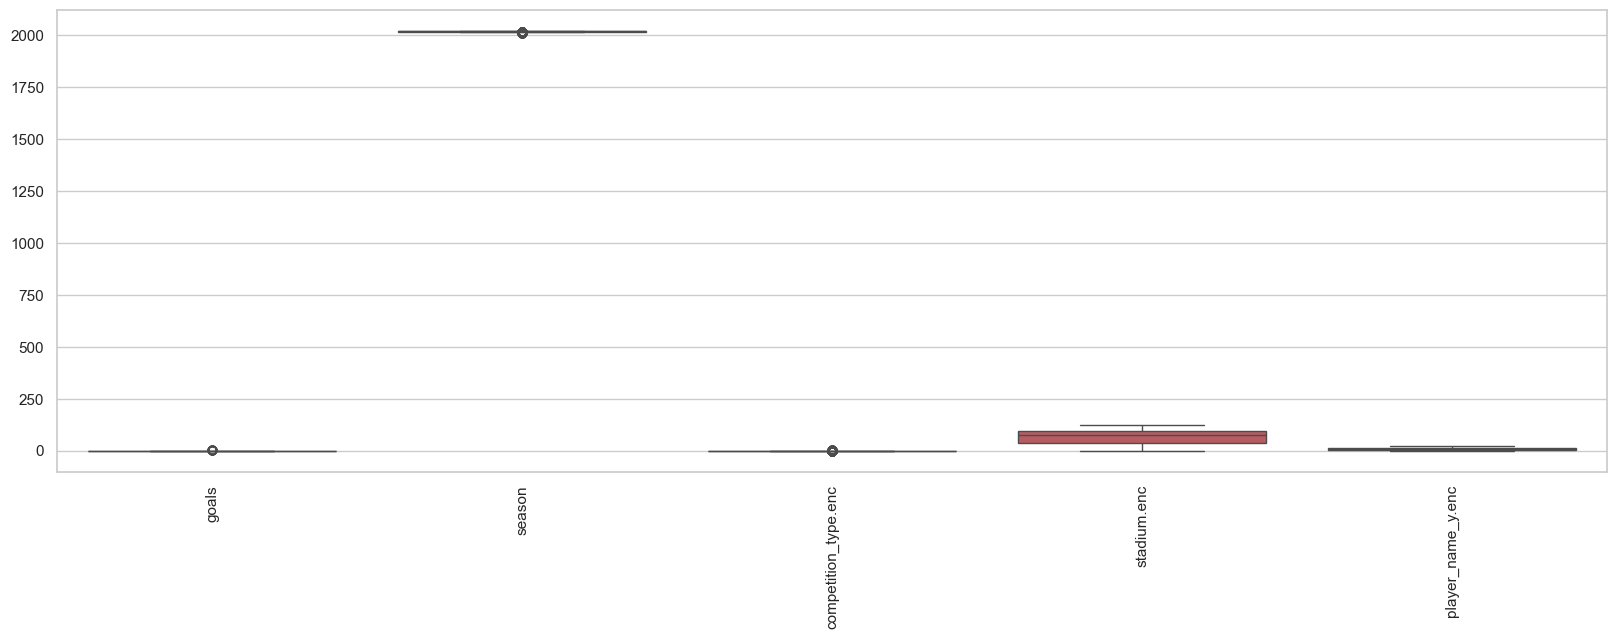

In [3065]:
# Outlier Assessment
sns.boxplot(data=new1_df)  # All columns by default
plt.gcf().set_size_inches(20, 6)
plt.xticks(rotation=90)
plt.show()

Interpretation- Data exists with outliers.

In [3067]:
# Outlier Treatment
def iqr_winsorization(df, thresh=1.5):
    df_numeric = df.select_dtypes(include=[np.number])  # Select numeric columns
    columns_to_treat = df_numeric.columns

    for col in columns_to_treat:
        Q1 = df_numeric[col].quantile(0.25)
        Q3 = df_numeric[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define fences
        lower_fence = Q1 - thresh * IQR
        upper_fence = Q3 + thresh * IQR

        # Winsorize outliers
        df_numeric.loc[df_numeric[col] < lower_fence, col] = lower_fence
        df_numeric.loc[df_numeric[col] > upper_fence, col] = upper_fence

    return df_numeric

df = pd.DataFrame(new1_df)
# Perform outlier treatment on all columns
new1_treated_df = iqr_winsorization(df.copy())
print(new1_treated_df)

      goals  season  competition_type.enc  stadium.enc  player_name_y.enc
0       0.0    2014                     1           60               20.0
1       0.0    2014                     1           60               20.0
2       0.0    2014                     1           60               20.0
3       0.0    2014                     1           60               20.0
4       0.0    2014                     1           60               20.0
...     ...     ...                   ...          ...                ...
4194    1.0    2020                     1           72               11.0
4195    1.0    2020                     1           72               11.0
4196    1.0    2020                     1           72               11.0
4197    1.0    2020                     1           72               11.0
4198    1.0    2020                     1           72               11.0

[4199 rows x 5 columns]


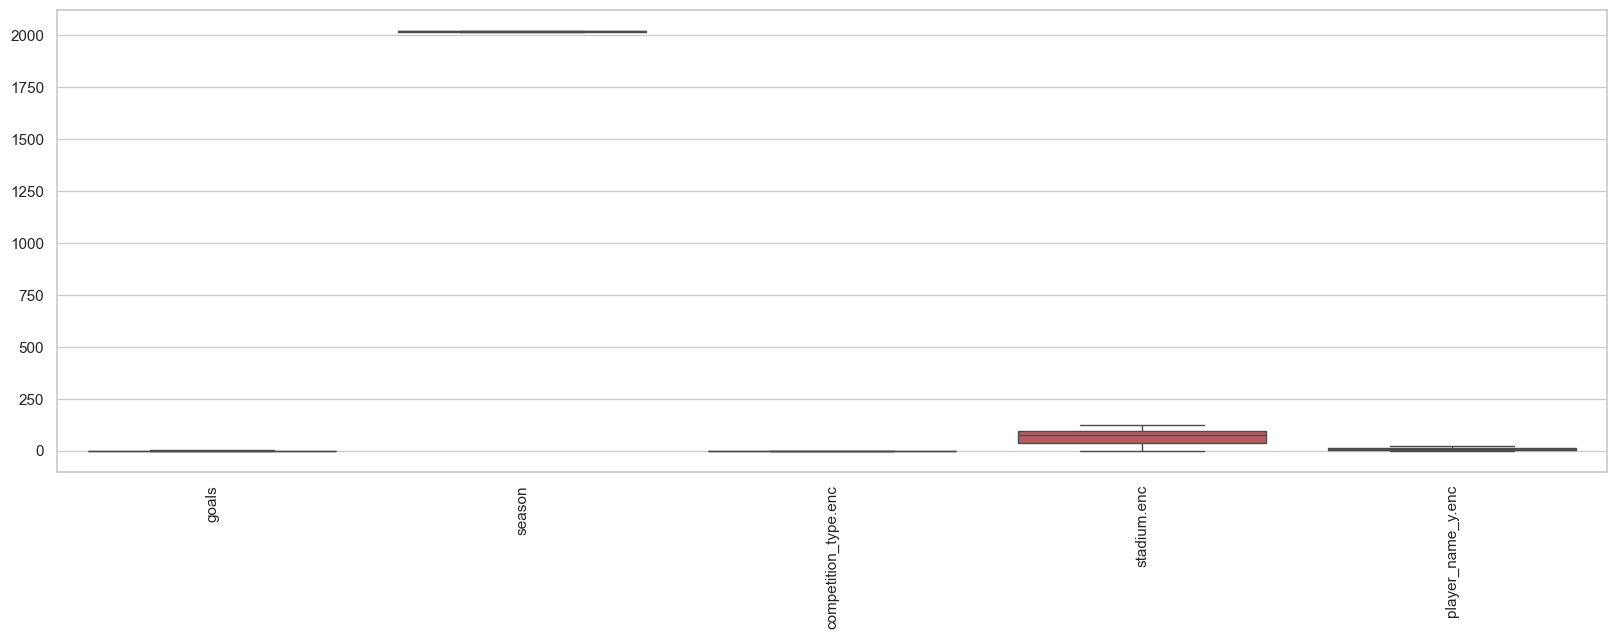

In [3068]:
# Outlier Assessment after Outlier Treatment
sns.boxplot(data=new1_treated_df)  # All columns by default
plt.gcf().set_size_inches(20, 6)
plt.xticks(rotation=90)
plt.show()

Interpretation- No outliers exist in the dataset post outlier treatment.

#### 3. Scaling Data

In [3071]:
cols = new1_treated_df.columns
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(new1_treated_df)
df1_scaled = pd.DataFrame(df1_scaled, columns=cols)
df1_scaled.head()

,goals,season,competition_type.enc,stadium.enc,player_name_y.enc
0,-0.733861,-2.176423,0.0,-0.261157,1.544203
1,-0.733861,-2.176423,0.0,-0.261157,1.544203
2,-0.733861,-2.176423,0.0,-0.261157,1.544203
3,-0.733861,-2.176423,0.0,-0.261157,1.544203
4,-0.733861,-2.176423,0.0,-0.261157,1.544203


In [3072]:
# Append the attendance.enc column to the scaled DataFrame
df1_scaled=pd.concat([df1_scaled , attendance_col_df], axis=1)
df1_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   goals                 4199 non-null   float64
 1   season                4199 non-null   float64
 2   competition_type.enc  4199 non-null   float64
 3   stadium.enc           4199 non-null   float64
 4   player_name_y.enc     4199 non-null   float64
 5   attendance.enc        4199 non-null   int32  
dtypes: float64(5), int32(1)
memory usage: 180.6 KB


#### 4. Checking Multicollinearity among independent variables for final feature selection

In [3074]:
# Selecting the cutoff value as 0.7
abs(df1_scaled.corr())>=0.7 # ignored the dependent column for scaling

,goals,season,competition_type.enc,stadium.enc,player_name_y.enc,attendance.enc
goals,True,False,False,False,False,False
season,False,True,False,False,False,False
competition_type.enc,False,False,False,False,False,False
stadium.enc,False,False,False,True,False,False
player_name_y.enc,False,False,False,False,True,False
attendance.enc,False,False,False,False,False,True


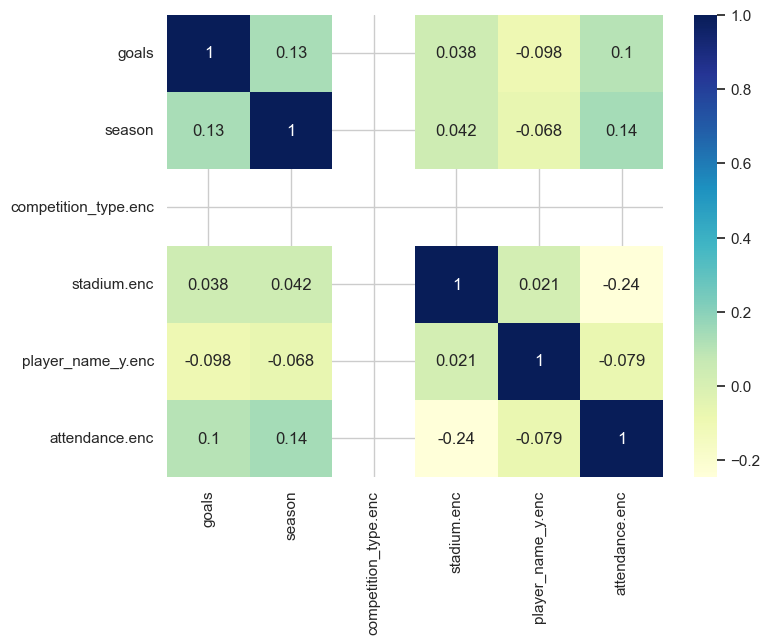

In [3075]:
# Plotting heatmap
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.heatmap(df1_scaled.corr(), annot=True, cmap="YlGnBu")
plt.show()

Interpretation- None of the variables have high correlation to each other (correlation absolute values are <0.70).

#### 5. Preparation of training and test datasets

In [3078]:
# Creating test and training datasets
att_train, att_test = train_test_split(df1_scaled,train_size = 0.8)
print('Size of training dataset: ', att_train.shape)
print('Size of test dataset: ', att_test.shape)

Size of training dataset:  (3359, 6)
Size of test dataset:  (840, 6)


In [3079]:
X_train = att_train.drop(columns='attendance.enc', axis =1)
Y_train = att_train['attendance.enc']
X_test = att_test.drop(columns='attendance.enc', axis =1)
Y_test = att_test['attendance.enc']
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((3359, 5), (3359,), (840, 5), (840,))

#### 6. Training the model

In [3081]:
# Logistic Regression - training the model
logreg1 = LogisticRegression()
logreg1.fit(X_train, Y_train)

# Using the trained model to predict the outcome of the X_Test dataset
Y_pred = logreg1.predict(X_test)

#### 7. Confusion matrix

In [3083]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_pred))
tn, fp, fn, tp = confusion_matrix(Y_test,Y_pred).ravel()
print(tn, fp, fn, tp)

[[296 121]
 [184 239]]
296 121 184 239


#### 8. Accuracy, Recall, F1-score, Precision

In [3085]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('accuracy:', accuracy_score(Y_test, Y_pred))#Combining the True positive and true negative cases 
#i.e records
print('recall:', recall_score(Y_test, Y_pred)) #Prediction got True negative cases
print('f1-score:', f1_score(Y_test, Y_pred)) #Prediction for True positive cases
print('precision:', precision_score(Y_test, Y_pred))# Prediction for True positive cases

accuracy: 0.6369047619047619
recall: 0.5650118203309693
f1-score: 0.6104725415070242
precision: 0.6638888888888889


#### 9. ROC-AUC

In [3087]:
# ROC Score
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(Y_test, logreg1.predict_proba(X_test)[:,1])
print('ROC:', roc)

ROC: 0.6868774483958933


<Figure size 1000x800 with 0 Axes>

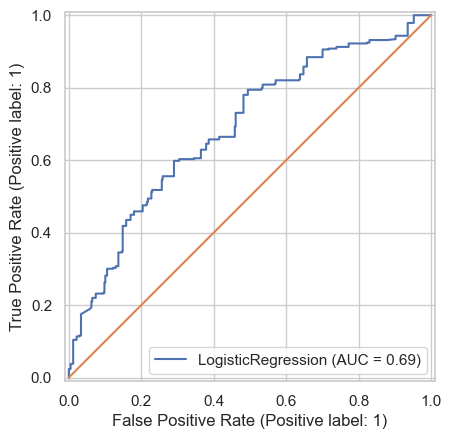

In [3088]:
# ROC curve
#from sklearn.metrics import plot_roc_curve 
#from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(10,8))
#plot_roc_curve(logreg,X_test,Y_test, color='orange')
RocCurveDisplay.from_estimator(logreg1, X_test, Y_test)
plt.plot([0,1],[0,1])
#plt.savefig('roc_logreg.png')  # Save the plot
plt.show()

#### Interpretation-

##### Overall Performance:

Accuracy (0.6369): The model appears to have decent accuracy in classifying high and low attendance overall. However, accuracy alone can be misleading, so we need to consider other metrics.

-----------------
##### Specific Class Performance (low attendance):

Recall (0.565): Recall measures the model's ability to identify true positives (low attendance). A moderate recall of 0.565 suggests the model misses on half of low attendance. This means the model might not be suitable for effectively identifying potential low attendance.

Precision (0.6638): Precision tells you the proportion of positive predictions (identifying low attendance) that are actually correct. A value of 0.6638 indicates that half of the times attendance flagged as low by the model would actually be low. This isn't necessarily bad on its own, but in combination with the moderate recall, it suggests the model might be generating some false positives (identifying high attendance as low).

F1-score (0.61):  This metric combines precision and recall, and its moderate value (0.61) reinforces the issues highlighted above: the model struggles to correctly classify low attendance, which is crucial for attendance assessment.

ROC Score (0.6868):  While not perfect, a score of 0.6868 on the ROC curve indicates moderate ability to distinguish between low and high attendance. It's closer to perfect performance (1.0).

-----------------
##### Key Takeaways:

a. The model's accuracy seems acceptable, but the moderate recall and F1-score reveal a weakness in identifying low attendance. This is an issue, especially for attendance assessment where missing low attendance can lead to misleading interpretations.

b. The precision of 0.6638 suggests that while the model might flag some true low attendance, it also generates many false positives. This can be misleading and require manual intervention to sort out true positives from false alarms.

c. The ROC score further emphasizes the model's overall performance being much better than random chance, but still not perfect (1).

-----------------
##### Recommendations: 

a. Look for potential problems with the data used to train the model. Imbalanced class distribution (e.g., significantly fewer low attendance compared to high attendance) can lead to models that prioritize the majority class and perform poorly on the minority class (low attendance in this case).

### 2. Logistic Regression for predicting Goals Scoring

In [3091]:
log2_df = merged_data[['minutes_played', 'competition_type', 'stadium', 'goals', 'player_name_y', 'season', 'position_y', 'position_x']]
log2_df

,minutes_played,competition_type,stadium,goals,player_name_y,season,position_y,position_x
0,70,domestic_league,Max-Morlock-Stadion,0,Timothy Chandler,2012,Right-Back,Defender
1,70,domestic_league,Max-Morlock-Stadion,0,Timothy Chandler,2012,Right-Back,Defender
2,70,domestic_league,Max-Morlock-Stadion,0,Timothy Chandler,2012,Right-Back,Defender
3,70,domestic_league,Max-Morlock-Stadion,0,Timothy Chandler,2012,Right-Back,Defender
4,70,domestic_league,Max-Morlock-Stadion,0,Timothy Chandler,2012,Right-Back,Defender
...,...,...,...,...,...,...,...,...
4194,77,domestic_league,Olympisch Stadion,1,Joseph Efford,2020,Centre-Forward,Attack
4195,77,domestic_league,Olympisch Stadion,1,Joseph Efford,2020,Centre-Forward,Attack
4196,77,domestic_league,Olympisch Stadion,1,Joseph Efford,2020,Centre-Forward,Attack
4197,77,domestic_league,Olympisch Stadion,1,Joseph Efford,2020,Centre-Forward,Attack


#### 1. Label Encoding

In [3093]:
# Encoding competition_type variable 
purpose_encoder = preprocessing.LabelEncoder()
purpose_encoder.fit(log2_df['competition_type'])
print(purpose_encoder.classes_)
log2_df['competition_type.enc'] = purpose_encoder.transform(log2_df['competition_type'])

['domestic_cup' 'domestic_league' 'international_cup' 'other']


In [3094]:
# Encoding stadium variable 
purpose_encoder = preprocessing.LabelEncoder()
purpose_encoder.fit(log2_df['stadium'])
print(purpose_encoder.classes_)
log2_df['stadium.enc'] = purpose_encoder.transform(log2_df['stadium'])

[' Bremer Brucke' 'AFAS Stadion' 'AMEX Stadium' 'Aalborg Portland Park'
 'Allianz Arena' 'Allianz Riviera' 'Anfield'
 'Argosstadion Achter de Kazerne' 'Audi Sportpark' 'BUKO Stadion'
 'BayArena' 'Blue Water Arena' 'Bramall Lane' 'Brondby Stadium'
 'Carrow Road' 'Cegeka Arena' 'Celtic Park' 'Ceres Park'
 'Civitas Metropolitano' 'Commerzbank Arena'
 'Constant Vanden Stock Stadion' 'Craven Cottage' 'DS Arena'
 'Daknamstadion' 'Decathlon Arena-Stade Pierre-Mauroy' 'Diaz Arena'
 'Dreisamstadion' 'Edmund-Plambeck-Stadion' 'Ernst-Abbe-Sportfeld'
 'Erve Asito' 'Etihad Stadium' 'Euroborg' 'Fortuna Sittard Stadion'
 'Freethielstadion' 'Friedrich Ludwig Jahn Sportpark'
 'GP Stadion am Hardtwald' 'Ghelamco Arena' 'Groupama Stadium'
 'Guldensporenstadion' 'Heinz-von-Heiden-Arena' 'Helsingor Stadium'
 'Herfolge stadium' 'Het Kuipje' 'Home Deluxe Arena' 'JYSK Park'
 'Jahnstadion Regensburg' 'Jan-Breydel-Stadion' 'Johan Cruijff ArenA'
 'King Power Stadium' 'Koning Willem II Stadion' 'Le Canonnier'
 'L

In [3095]:
# Encoding player_name_y variable 
purpose_encoder = preprocessing.LabelEncoder()
purpose_encoder.fit(log2_df['player_name_y'])
print(purpose_encoder.classes_)
log2_df['player_name_y.enc'] = purpose_encoder.transform(log2_df['player_name_y'])

['Andrija Novakovich' 'Caleb Stanko' 'Christian Cappis'
 'Christian Pulisic' 'Desevio Payne' 'Emmanuel Sabbi' 'Erik Palmer-Brown'
 'Giovanni Reyna' 'John Anthony Brooks' 'Jonathan Amon' 'Jordan'
 'Joseph Efford' 'Josh Sargent' 'Julian Green' 'Kenny Saief'
 'Luca de la Torre' 'Lynden Gooch' 'Sergino Dest' 'Terrence Boyd'
 'Tim Ream' 'Timothy Chandler' 'Timothy Weah' 'Tyler Adams'
 'Weston McKennie']


In [3096]:
# Encoding position_y variable 
purpose_encoder = preprocessing.LabelEncoder()
purpose_encoder.fit(log2_df['position_y'])
print(purpose_encoder.classes_)
log2_df['position_y.enc'] = purpose_encoder.transform(log2_df['position_y'])

['Attacking Midfield' 'Central Midfield' 'Centre-Back' 'Centre-Forward'
 'Defensive Midfield' 'Left Winger' 'Left-Back' 'Right Midfield'
 'Right Winger' 'Right-Back']


In [3097]:
# Encoding position_x variable 
purpose_encoder = preprocessing.LabelEncoder()
purpose_encoder.fit(log2_df['position_x'])
print(purpose_encoder.classes_)
log2_df['position_x.enc'] = purpose_encoder.transform(log2_df['position_x'])

['Attack' 'Defender' 'Midfield']


In [3098]:
# Define categories (bins) and labels for goals column
log2_df['goals_c'] = np.where(log2_df['goals'] > 0, 'Goals scored', 'Goal not scored')
# Print the number of unique values
print(f"Number of unique values: {log2_df['goals_c'].unique()}")

Number of unique values: ['Goal not scored' 'Goals scored']


In [3099]:
# Encoding goals variable
attendance_encoder = preprocessing.LabelEncoder()
attendance_encoder.fit(log2_df['goals_c'])
print(attendance_encoder.classes_)
log2_df['goals.enc'] = attendance_encoder.transform(log2_df['goals_c'])

['Goal not scored' 'Goals scored']


In [3100]:
# Removing competition_type, stadium, player_name_y, position_y, position_x, goals columns from the data
columns_to_drop2 = ["competition_type", "stadium", "player_name_y", "position_y", "position_x", "goals"]
log2_df = log2_df.drop(columns_to_drop2, axis=1)
log2_df

,minutes_played,season,competition_type.enc,stadium.enc,player_name_y.enc,position_y.enc,position_x.enc,goals_c,goals.enc
0,70,2012,1,60,20,9,1,Goal not scored,0
1,70,2012,1,60,20,9,1,Goal not scored,0
2,70,2012,1,60,20,9,1,Goal not scored,0
3,70,2012,1,60,20,9,1,Goal not scored,0
4,70,2012,1,60,20,9,1,Goal not scored,0
...,...,...,...,...,...,...,...,...,...
4194,77,2020,1,72,11,3,0,Goals scored,1
4195,77,2020,1,72,11,3,0,Goals scored,1
4196,77,2020,1,72,11,3,0,Goals scored,1
4197,77,2020,1,72,11,3,0,Goals scored,1


In [3101]:
# Retrieving goals.enc column from the dataset and storing into another dataframe
goals_col_df = pd.DataFrame(log2_df[['goals.enc']])

# Removing goals.enc column from the dataset as scaling is not required for this column
new2_df = pd.DataFrame(log2_df.drop(['goals.enc'], axis=1))

#### 2. Outlier Assessment and Treatment

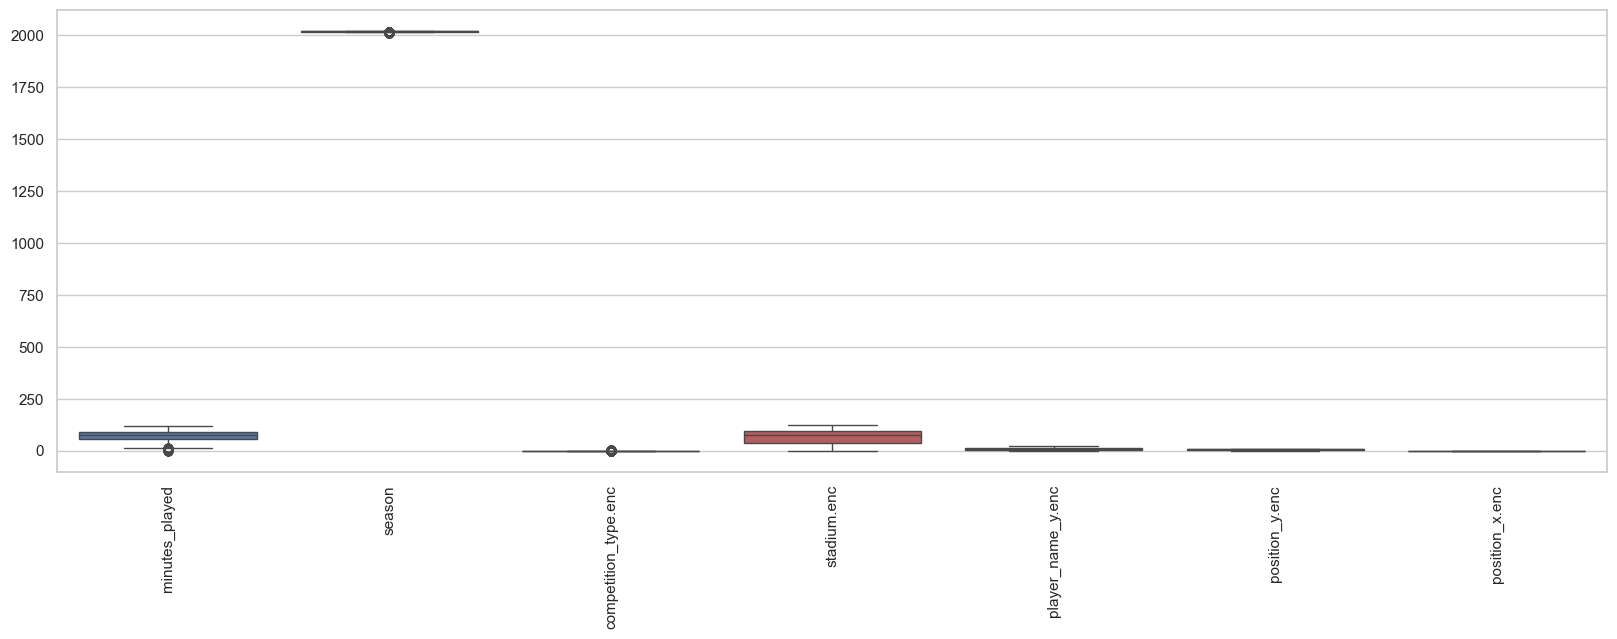

In [3103]:
# Outlier Assessment
sns.boxplot(data=new2_df)  # All columns by default
plt.gcf().set_size_inches(20, 6)
plt.xticks(rotation=90)
plt.show()

Interpretation- Data exists with outliers.

In [3105]:
# Outlier Treatment
def iqr_winsorization(df, thresh=1.5):
    df_numeric = df.select_dtypes(include=[np.number])  # Select numeric columns
    columns_to_treat = df_numeric.columns

    for col in columns_to_treat:
        Q1 = df_numeric[col].quantile(0.25)
        Q3 = df_numeric[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define fences
        lower_fence = Q1 - thresh * IQR
        upper_fence = Q3 + thresh * IQR

        # Winsorize outliers
        df_numeric.loc[df_numeric[col] < lower_fence, col] = lower_fence
        df_numeric.loc[df_numeric[col] > upper_fence, col] = upper_fence

    return df_numeric

df = pd.DataFrame(new2_df)
# Perform outlier treatment on all columns
new2_treated_df = iqr_winsorization(df.copy())
print(new2_treated_df)

      minutes_played  season  competition_type.enc  stadium.enc  \
0               70.0    2014                     1           60   
1               70.0    2014                     1           60   
2               70.0    2014                     1           60   
3               70.0    2014                     1           60   
4               70.0    2014                     1           60   
...              ...     ...                   ...          ...   
4194            77.0    2020                     1           72   
4195            77.0    2020                     1           72   
4196            77.0    2020                     1           72   
4197            77.0    2020                     1           72   
4198            77.0    2020                     1           72   

      player_name_y.enc  position_y.enc  position_x.enc  
0                  20.0             9.0             1.0  
1                  20.0             9.0             1.0  
2                  20

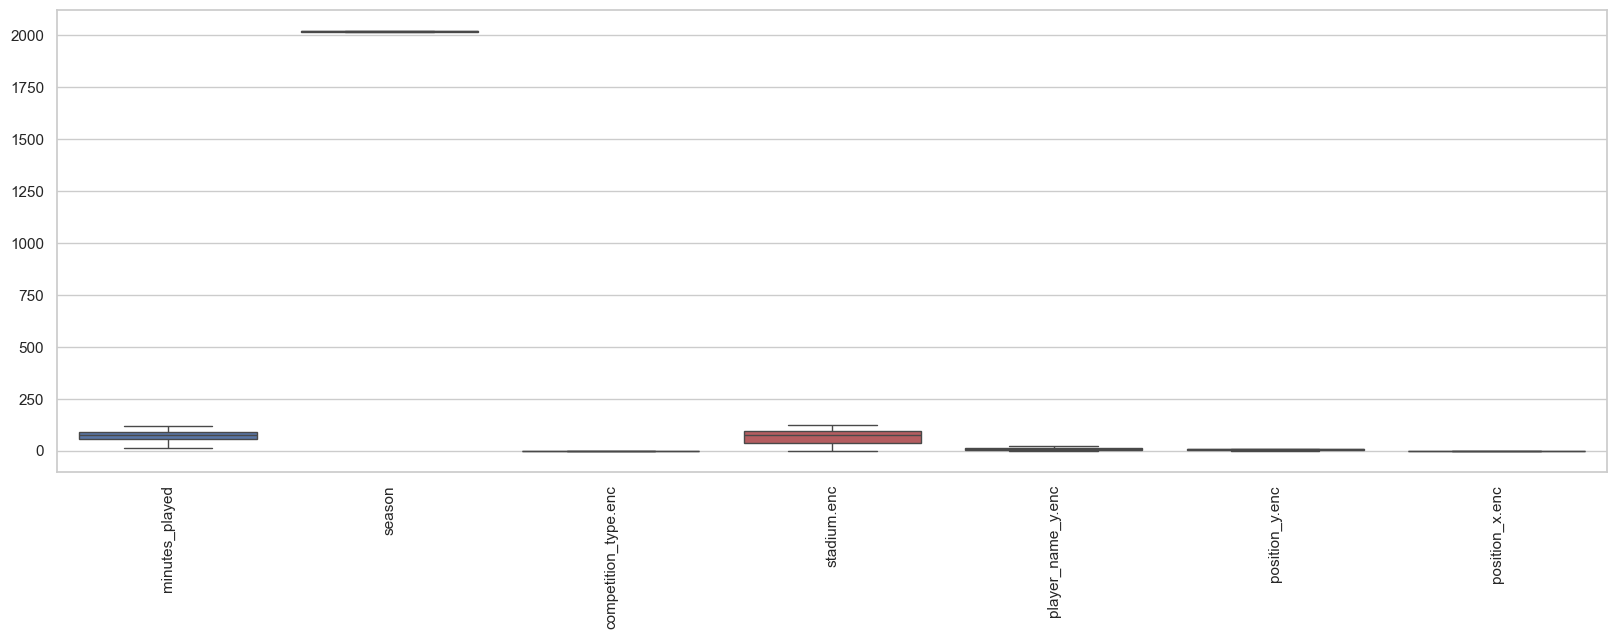

In [3106]:
# Outlier Assessment after Outlier Treatment
sns.boxplot(data=new2_treated_df)  # All columns by default
plt.gcf().set_size_inches(20, 6)
plt.xticks(rotation=90)
plt.show()

Interpretation- No outliers exist in the dataset post outlier treatment.

#### 3. Scaling Data

In [3109]:
cols = new2_treated_df.columns
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(new2_treated_df)
df2_scaled = pd.DataFrame(df2_scaled, columns=cols)
df2_scaled.head()

,minutes_played,season,competition_type.enc,stadium.enc,player_name_y.enc,position_y.enc,position_x.enc
0,0.004798,-2.176423,0.0,-0.261157,1.544203,1.152828,0.586063
1,0.004798,-2.176423,0.0,-0.261157,1.544203,1.152828,0.586063
2,0.004798,-2.176423,0.0,-0.261157,1.544203,1.152828,0.586063
3,0.004798,-2.176423,0.0,-0.261157,1.544203,1.152828,0.586063
4,0.004798,-2.176423,0.0,-0.261157,1.544203,1.152828,0.586063


In [3110]:
# Append the goals.enc column to the scaled DataFrame
df2_scaled=pd.concat([df2_scaled , goals_col_df], axis=1)
df2_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   minutes_played        4199 non-null   float64
 1   season                4199 non-null   float64
 2   competition_type.enc  4199 non-null   float64
 3   stadium.enc           4199 non-null   float64
 4   player_name_y.enc     4199 non-null   float64
 5   position_y.enc        4199 non-null   float64
 6   position_x.enc        4199 non-null   float64
 7   goals.enc             4199 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 246.2 KB


#### 4. Checking Multicollinearity among independent variables for final feature selection

In [3112]:
# Selecting the cutoff value as 0.7
abs(df2_scaled.corr())>=0.7 # ignored the dependent column for scaling

,minutes_played,season,competition_type.enc,stadium.enc,player_name_y.enc,position_y.enc,position_x.enc,goals.enc
minutes_played,True,False,False,False,False,False,False,False
season,False,True,False,False,False,False,False,False
competition_type.enc,False,False,False,False,False,False,False,False
stadium.enc,False,False,False,True,False,False,False,False
player_name_y.enc,False,False,False,False,True,False,False,False
position_y.enc,False,False,False,False,False,True,False,False
position_x.enc,False,False,False,False,False,False,True,False
goals.enc,False,False,False,False,False,False,False,True


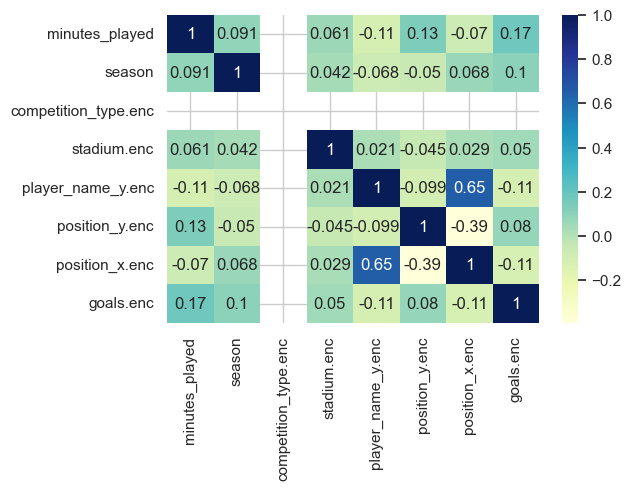

In [3113]:
# Plotting heatmap
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax = sns.heatmap(df2_scaled.corr(), annot=True, cmap="YlGnBu")
plt.show()

Interpretation- None of the variables have high correlation to each other (correlation absolute values are <0.70).

#### 5. Preparation of training and test datasets

In [3116]:
# Creating test and training datasets
goals_train, goals_test = train_test_split(df2_scaled,train_size = 0.8)
print('Size of training dataset: ', goals_train.shape)
print('Size of test dataset: ', goals_test.shape)

Size of training dataset:  (3359, 8)
Size of test dataset:  (840, 8)


In [3117]:
X_train = goals_train.drop(columns='goals.enc', axis =1)
Y_train = goals_train['goals.enc']
X_test = goals_test.drop(columns='goals.enc', axis =1)
Y_test = goals_test['goals.enc']
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((3359, 7), (3359,), (840, 7), (840,))

#### 6. Training the model

In [3119]:
# Logistic Regression - training the model
logreg2 = LogisticRegression()
logreg2.fit(X_train, Y_train)

# Using the trained model to predict the outcome of the X_Test dataset
Y_pred = logreg2.predict(X_test)

#### 7. Confusion matrix

In [3121]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_pred))
tn, fp, fn, tp = confusion_matrix(Y_test,Y_pred).ravel()
print(tn, fp, fn, tp)

[[467  42]
 [246  85]]
467 42 246 85


#### 8. Accuracy, Recall, F1-score, Precision

In [3123]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('accuracy:', accuracy_score(Y_test, Y_pred))#Combining the True positive and true negative cases 
#i.e records
print('recall:', recall_score(Y_test, Y_pred)) #Prediction got True negative cases
print('f1-score:', f1_score(Y_test, Y_pred)) #Prediction for True positive cases
print('precision:', precision_score(Y_test, Y_pred))# Prediction fot True positive cases

accuracy: 0.6571428571428571
recall: 0.256797583081571
f1-score: 0.37117903930131
precision: 0.6692913385826772


#### 9. ROC-AUC

In [3125]:
# ROC Score
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(Y_test, logreg2.predict_proba(X_test)[:,1])
print('ROC:', roc)

ROC: 0.5984870517987405


<Figure size 1000x800 with 0 Axes>

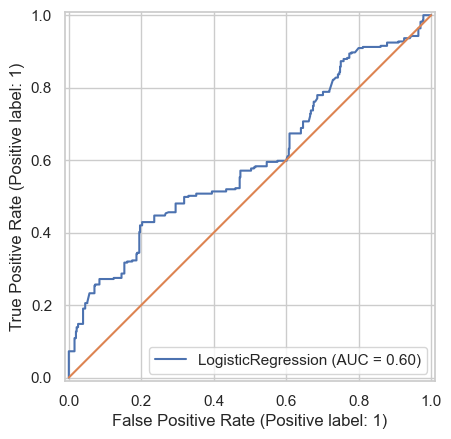

In [3126]:
# ROC curve
#from sklearn.metrics import plot_roc_curve 
#from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(10,8))
#plot_roc_curve(logreg,X_test,Y_test, color='orange')
RocCurveDisplay.from_estimator(logreg2, X_test, Y_test)
plt.plot([0,1],[0,1])
plt.show()

#### Interpretation-

##### Overall Performance:

Accuracy (0.6571): The model appears to have decent accuracy in classifying goals scored or not overall. However, accuracy alone can be misleading, so we need to consider other metrics.

-----------------
##### Specific Class Performance (goals scored):

Recall (0.2567): Recall measures the model's ability to identify true positives (goals scored). A low recall of 0.2567 suggests the model misses a high proportion of goals scored. This means the model might not be suitable for effectively identifying potential goals scored.

Precision (0.6692): Precision tells you the proportion of positive predictions (identifying goals scored) that are actually correct. A value of 0.6692 indicates that more than half of the times goals flagged as scored by the model would actually be scored. This isn't necessarily bad on its own, but in combination with the low recall, it suggests the model might be generating some false positives (identifying goals not scored as scored).

F1-score (0.3711):  This metric combines precision and recall, and its low value (0.3711) reinforces the issues highlighted above: the model struggles to correctly classify goals scored, which is crucial for goals scored or not assessment.

ROC Score (0.5984):  While not perfect, a score of 0.5984 on the ROC curve indicates moderate ability to distinguish between goals scored or not. It's closer to perfect performance (1.0).

-----------------
##### Key Takeaways:

a. The model's accuracy seems acceptable, but the low recall and F1-score reveal a weakness in identifying goals scored. This is an issue, especially for goals scored or not assessment where missing goals scored can lead to misleading interpretations.
b. The precision of 0.6692 suggests that while the model might flag some true goals scored, it also generates some false positives. This can be misleading and require manual intervention to sort out true positives from false alarms.
c. The ROC score further emphasizes the model's overall performance being much better than random chance, but still not perfect (1).

-----------------
##### Recommendations: 
Look for potential problems with the data used to train the model. Imbalanced class distribution (e.g., significantly fewer goals scored compared to goals not scored) can lead to models that prioritize the majority class and perform poorly on the minority class (goals scored in this case).

### 3. Player Profile and Market Value

#### 1. Player's market value vs. goals scored

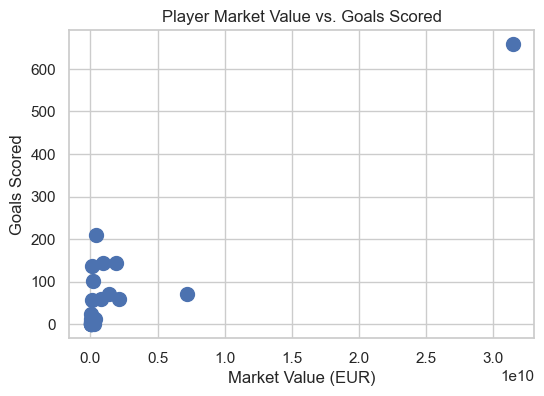

In [3130]:
# Group the data by player name and sum the goals scored
grouped_data = merged_data.groupby('player_name_y')[['goals','market_value_in_eur']].sum().reset_index()

# Create the scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(grouped_data['market_value_in_eur'], grouped_data['goals'], s=100)  # Adjust marker size as needed
plt.xlabel('Market Value (EUR)')
plt.ylabel('Goals Scored')
plt.title('Player Market Value vs. Goals Scored')
plt.grid(True)
plt.show()

Interpretation- The higher the number of goals scored, the higher is the player's market value.

#### 2. Player's age vs. goals scored

In [3133]:
# Calculate age in years as of today
def calculate_age(birthdate):
    today = date.today()
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age
    
merged_data['age'] = merged_data['date_of_birth'].apply(calculate_age)

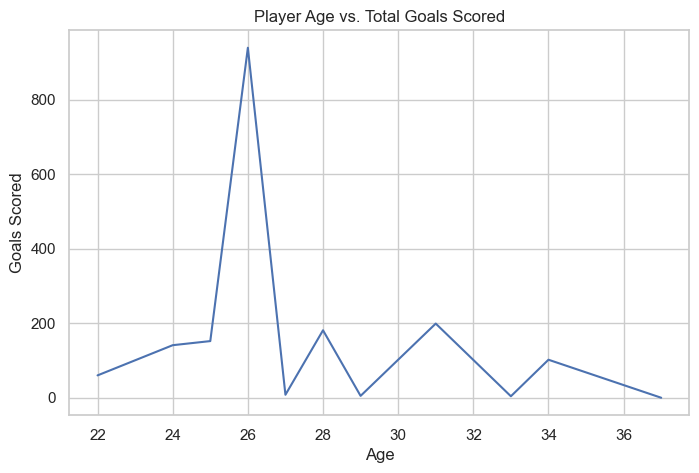

In [3134]:
# Group by age and sum goals
grouped_by_age = merged_data.groupby('age')['goals'].sum().reset_index()

# Create the line chart
plt.figure(figsize=(8, 5))
plt.plot(grouped_by_age['age'], grouped_by_age['goals'])
plt.xlabel('Age')
plt.ylabel('Goals Scored')
plt.title('Player Age vs. Total Goals Scored')
plt.grid(True)
plt.show()

Interpretation- Number of goals scored by players peaked at 26 years of age and decreased as per increasing age.

## Sprint 5- Solving Business Questions- Player Profile and Market Value

### 1. Predicting market_value_in_eur using Simple Linear Regression

In [3138]:
slr_df = merged_data[['market_value_in_eur', 'assists', 'height_in_cm', 'minutes_played', 'goals', 'away_club_goals', 'home_club_goals']]
slr_df

,market_value_in_eur,assists,height_in_cm,minutes_played,goals,away_club_goals,home_club_goals
0,700000.0,0,186.0,70,0,2,1
1,700000.0,0,186.0,70,0,2,1
2,700000.0,0,186.0,70,0,2,1
3,700000.0,0,186.0,70,0,2,1
4,700000.0,0,186.0,70,0,2,1
...,...,...,...,...,...,...,...
4194,300000.0,0,176.0,77,1,2,3
4195,300000.0,0,176.0,77,1,2,3
4196,300000.0,0,176.0,77,1,2,3
4197,300000.0,0,176.0,77,1,2,3


#### 1. Outlier Assessment and Treatment

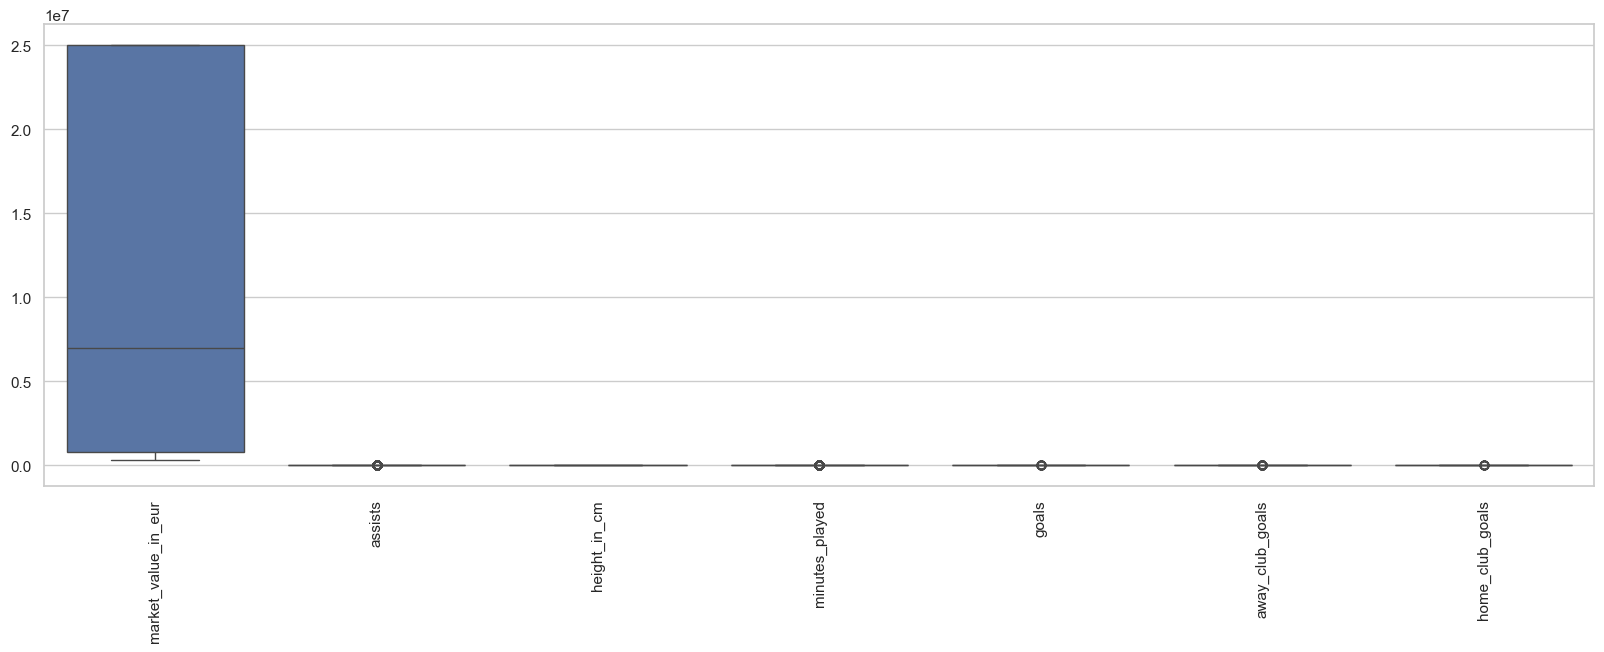

In [3140]:
# Outlier Assessment
sns.boxplot(data=slr_df)  # All columns by default
plt.gcf().set_size_inches(20, 6)
plt.xticks(rotation=90)
plt.show()

Interpretation- Data exists with outliers.

In [3142]:
# Outlier Treatment
def iqr_winsorization(df, thresh=1.5):
    df_numeric = df.select_dtypes(include=[np.number])  # Select numeric columns
    columns_to_treat = df_numeric.columns

    for col in columns_to_treat:
        Q1 = df_numeric[col].quantile(0.25)
        Q3 = df_numeric[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define fences
        lower_fence = Q1 - thresh * IQR
        upper_fence = Q3 + thresh * IQR

        # Winsorize outliers
        df_numeric.loc[df_numeric[col] < lower_fence, col] = lower_fence
        df_numeric.loc[df_numeric[col] > upper_fence, col] = upper_fence

    return df_numeric

df = pd.DataFrame(slr_df)
# Perform outlier treatment on all columns
slr_treated_df = iqr_winsorization(df.copy())
print(slr_treated_df)

      market_value_in_eur  assists  height_in_cm  minutes_played  goals  \
0                700000.0        0         186.0            70.0    0.0   
1                700000.0        0         186.0            70.0    0.0   
2                700000.0        0         186.0            70.0    0.0   
3                700000.0        0         186.0            70.0    0.0   
4                700000.0        0         186.0            70.0    0.0   
...                   ...      ...           ...             ...    ...   
4194             300000.0        0         176.0            77.0    1.0   
4195             300000.0        0         176.0            77.0    1.0   
4196             300000.0        0         176.0            77.0    1.0   
4197             300000.0        0         176.0            77.0    1.0   
4198             300000.0        0         176.0            77.0    1.0   

      away_club_goals  home_club_goals  
0                   2                1  
1                

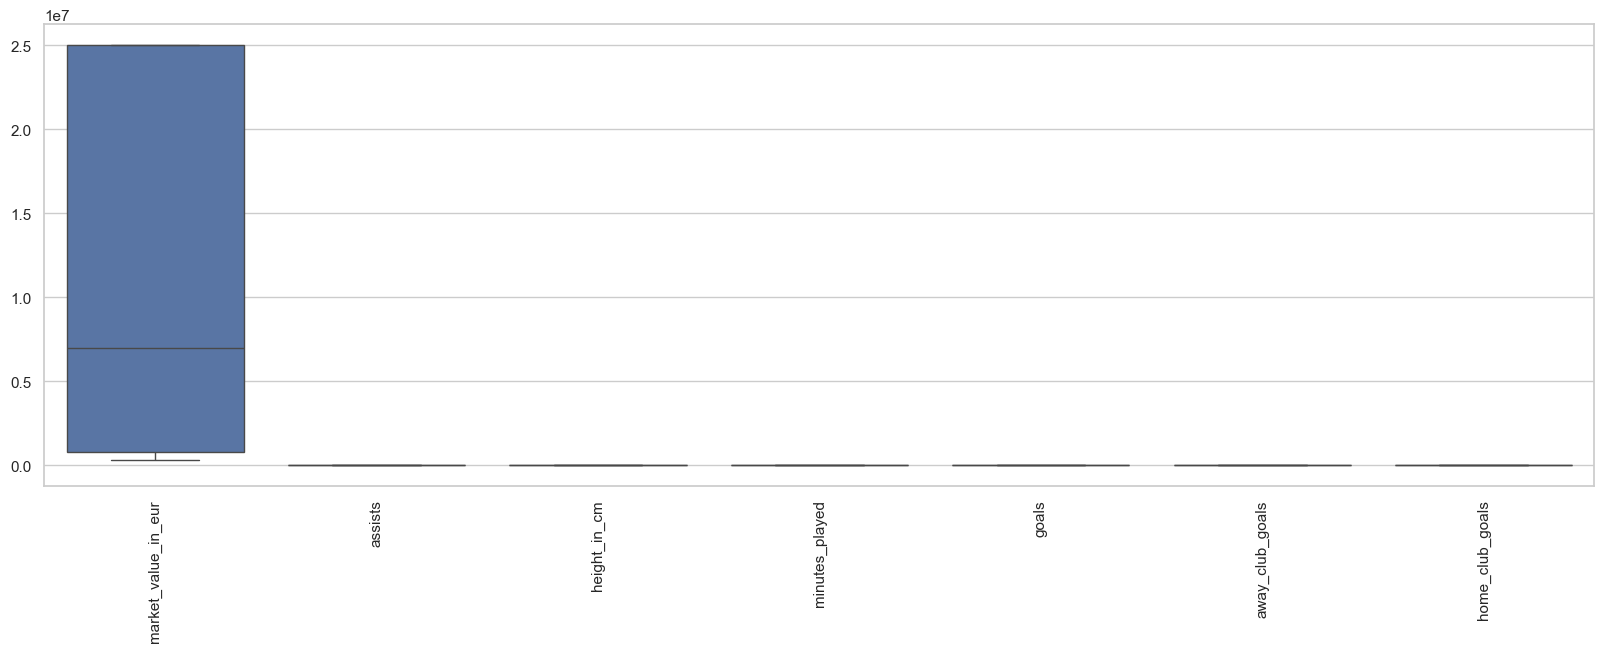

In [3143]:
# Outlier Assessment after Outlier Treatment
sns.boxplot(data=slr_treated_df)  # All columns by default
plt.gcf().set_size_inches(20, 6)
plt.xticks(rotation=90)
plt.show()

Interpretation- No outliers exist in the dataset post outlier treatment.

#### 2. Scaling Data

In [3146]:
cols = slr_treated_df.columns
scaler = StandardScaler()
df3_scaled = scaler.fit_transform(slr_treated_df)
df3_scaled = pd.DataFrame(df3_scaled, columns=cols)
df3_scaled.head()

,market_value_in_eur,assists,height_in_cm,minutes_played,goals,away_club_goals,home_club_goals
0,-0.977711,0.0,0.650517,0.004798,-0.733861,0.342172,-0.588925
1,-0.977711,0.0,0.650517,0.004798,-0.733861,0.342172,-0.588925
2,-0.977711,0.0,0.650517,0.004798,-0.733861,0.342172,-0.588925
3,-0.977711,0.0,0.650517,0.004798,-0.733861,0.342172,-0.588925
4,-0.977711,0.0,0.650517,0.004798,-0.733861,0.342172,-0.588925


In [3147]:
# Extract the last row index
last_row_index1 = len(df3_scaled) - 1 #Get the Length (number of rows) and subtract 1 for last index

# Extract the last row using iloc and store in a new DataFrame
new3_data = df3_scaled.iloc[last_row_index1]

# Reshape the extracted Series into a DataFrame (optional)
new3_data_df = new3_data.to_frame().transpose()
new3_data_df

,market_value_in_eur,assists,height_in_cm,minutes_played,goals,away_club_goals,home_club_goals
4198,-1.014459,0.0,-0.907236,0.319208,1.007089,0.342172,0.741304


In [3148]:
# Retrieve original data by excluding new data
df3_scaled = df3_scaled.iloc[:-1]
df3_scaled

,market_value_in_eur,assists,height_in_cm,minutes_played,goals,away_club_goals,home_club_goals
0,-0.977711,0.0,0.650517,0.004798,-0.733861,0.342172,-0.588925
1,-0.977711,0.0,0.650517,0.004798,-0.733861,0.342172,-0.588925
2,-0.977711,0.0,0.650517,0.004798,-0.733861,0.342172,-0.588925
3,-0.977711,0.0,0.650517,0.004798,-0.733861,0.342172,-0.588925
4,-0.977711,0.0,0.650517,0.004798,-0.733861,0.342172,-0.588925
...,...,...,...,...,...,...,...
4193,-1.014459,0.0,-0.907236,0.319208,1.007089,0.342172,0.741304
4194,-1.014459,0.0,-0.907236,0.319208,1.007089,0.342172,0.741304
4195,-1.014459,0.0,-0.907236,0.319208,1.007089,0.342172,0.741304
4196,-1.014459,0.0,-0.907236,0.319208,1.007089,0.342172,0.741304


#### 3. Checking Multicollinearity among independent variables for final feature selection

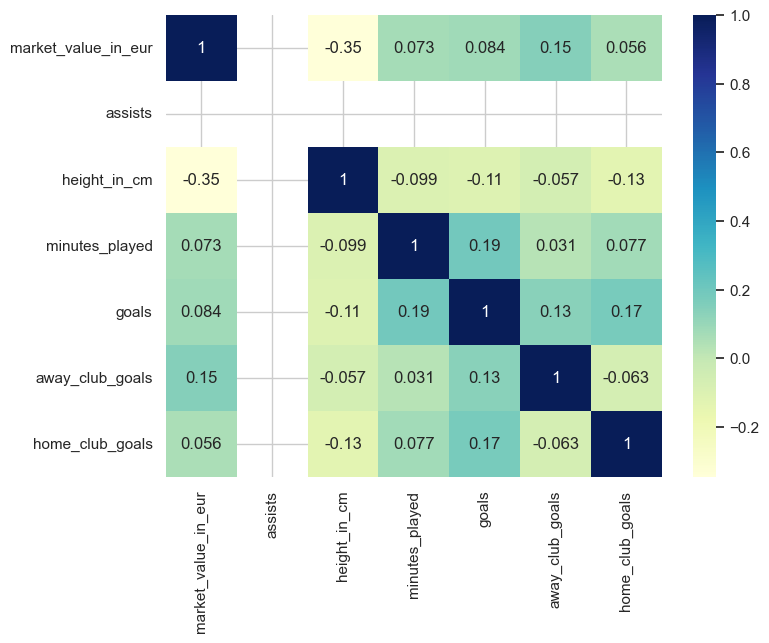

In [3150]:
# Plotting correlation heatmap
fig,ax = plt.subplots(1,1, figsize = (8,6))
ax = sns.heatmap(df3_scaled.corr(), annot = True, cmap = "YlGnBu")
plt.show()

Interpretation- None of the variables have high correlation to each other (correlation absolute values are <0.70).

In [3152]:
# To show the correlation values between 'market_value_in_eur' and all other features in consideration
df3_scaled.corr()[["market_value_in_eur"]].sort_values("market_value_in_eur", ascending=False)

,market_value_in_eur
market_value_in_eur,1.000000
away_club_goals,0.146473
goals,0.084307
minutes_played,0.073422
home_club_goals,0.055927
height_in_cm,-0.346163
assists,NaN


Interpretation- Let's predict the 'market_value_in_eur' using the feature 'away_club_goals' as it's correlation value is highest in comparison to other features.

In [3154]:
# Feature selection based on correlation
columns_to_drop2 = ["goals", "minutes_played", "home_club_goals", "height_in_cm", "assists"]
df3_scaled_selected = df3_scaled.drop(columns_to_drop2, axis = 1)
df3_scaled_selected

,market_value_in_eur,away_club_goals
0,-0.977711,0.342172
1,-0.977711,0.342172
2,-0.977711,0.342172
3,-0.977711,0.342172
4,-0.977711,0.342172
...,...,...
4193,-1.014459,0.342172
4194,-1.014459,0.342172
4195,-1.014459,0.342172
4196,-1.014459,0.342172


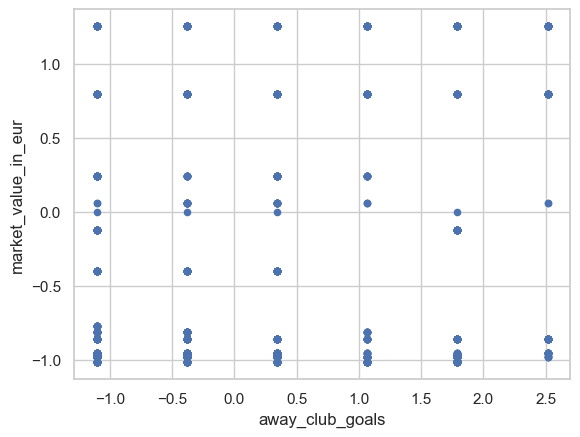

In [3155]:
# Visualization of Data
fig, ax = plt.subplots()
ax.set_xlabel("x_label", fontsize = 12)
ax.set_ylabel("y_label", fontsize = 12)
df3_scaled_selected.plot.scatter(x = "away_club_goals", y = "market_value_in_eur", s = 20, ax=ax)
plt.show()

#### 4. Preparation of training and test datasets

In [3157]:
# Splitting data
X1 = np.array(df3_scaled_selected["away_club_goals"]).reshape((-1,1)) #reshape is required when we are dealing with one independent feature
y = np.array(df3_scaled_selected['market_value_in_eur'])
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y,test_size=0.3, random_state=200)
X1.shape

(4198, 1)

#### 5. Training the model

In [3159]:
# Calculation of a and b for full data
# Build model and fit with data
s_model1 = LinearRegression().fit(X_train1, y_train1)
s_r_sq1 = s_model1.score(X_train1, y_train1)
print('s_r_sq1:', s_r_sq1)

s_r_sq1: 0.02181397825338327


In [3160]:
# print intercept and slope of the model
print('intercept:', s_model1.intercept_) #a 
print('slope:', s_model1.coef_) #b

intercept: 0.013483431721482475
slope: [0.14625974]


#### 6. Predicting the model

In [3162]:
# Predict the model using test data
y_pred1 = s_model1.predict(X_test1)
print('predicted response:', y_pred1, sep='\n')

predicted response:
[ 0.06352948 -0.04244297 -0.04244297 ... -0.04244297  0.27547439
 -0.14841542]


In [3163]:
new3_data.drop('market_value_in_eur', inplace=True)
X1_new_data = np.array(new3_data["away_club_goals"]).reshape((-1,1))
y_pred_new_data = s_model1.predict(X1_new_data)
y_pred_new_data

array([0.06352948])

#### 7. Evaluating the model

In [3165]:
# Evaluate MSE, MAE, RMSE
MSE = mean_squared_error(y_test1, y_pred1)
MAE = mean_absolute_error(y_test1,y_pred1)
RMSE = mean_squared_error(y_test1, y_pred1, squared=False)
print('MSE:',MSE)
print('MAE:',MAE)
print('RMSE:',RMSE)

MSE: 0.9673449419102387
MAE: 0.9299045214463564
RMSE: 0.9835369550302818


In [3166]:
# Evaluate R2 Score
from sklearn.metrics import r2_score
r2 = r2_score(y_test1, y_pred1)
print(f"The R2 score of the model is:", r2)

The R2 score of the model is: 0.017903573817201313


In [3167]:
# Reshape the new data into a 2D array for prediction
new3_data_array = np.reshape(new3_data_df[['away_club_goals']], (1, -1))

In [3168]:
# Predict the target value for the new data
predicted_value1 = s_model1.predict(new3_data_array)

# Print the predicted value
print("Predicted value for the new data:", predicted_value1[0])

Predicted value for the new data: 0.06352948481153584


In [3169]:
# Original value of the new data
new3_data_df['market_value_in_eur']

4198   -1.014459
Name: market_value_in_eur, dtype: float64

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


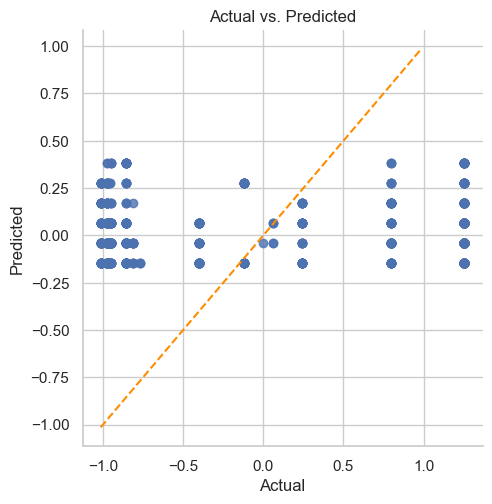

In [3170]:
# Checking for Linear Relationship
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

def linear_assumption(model, features, label):
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()
    
linear_assumption(s_model1, X_test1, y_test1)

Interpretation- We observe that the linear relationship assumption is not met.

Assumption: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


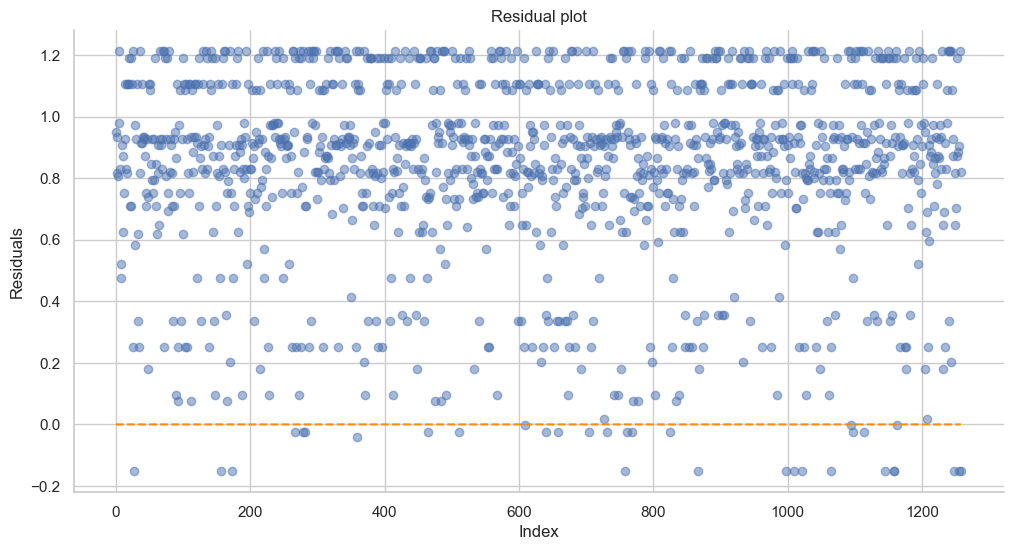

In [3172]:
# Checking Homoscedasticity: Plot the residuals of linear regression
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    #print(df_results)
    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residual plot')
    plt.xlabel('Index')
    plt.ylabel('Residuals')
    plt.show()

homoscedasticity_assumption(s_model1, X_test1, y_test1)

Interpretation- We observe an uneven spread of residuals, most are above and very few are below the zero line across all indices, so there is no evidence of homoscedasticity.

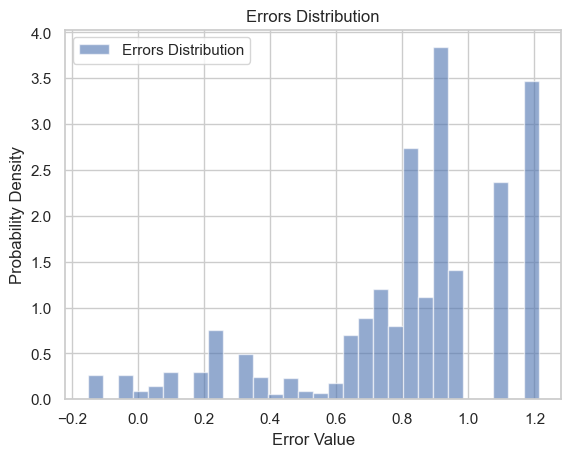

In [3174]:
# Error Normality Curve
df3_results = calculate_residuals(s_model1, X_test1, y_test1)
plt.hist(df3_results.Residuals, density=True, bins=30, alpha=0.6, label='Errors Distribution')  # Plot errors histogram
plt.xlabel('Error Value')
plt.ylabel('Probability Density')
plt.title('Errors Distribution')
plt.legend()
plt.grid(True)
plt.show()

Interpretation- Error distribution curve doesn't show much normality in nature.

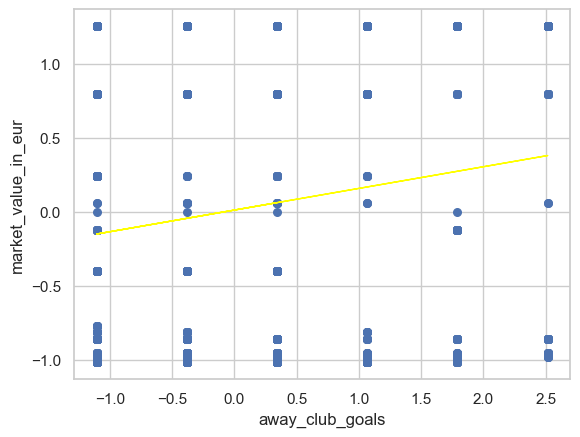

In [3176]:
# Plot for data with Regression Line
fig, ax = plt.subplots()
ax.set_xlabel('xlabel', fontsize=12)
ax.set_ylabel('ylabel', fontsize=12)
#plt.ylim((0,4))

df3_scaled_selected.plot.scatter(x = 'away_club_goals', y = 'market_value_in_eur', s = 30, ax=ax)
plt.plot(X_test1, y_pred1, color="yellow", linewidth=1)
plt.show()

#### Interpretation-
Based on the evaluation scores, here's the interpretation of the simple linear regression model's performance for predicting market_value_in_eur based on away_club_goals:

----------------------
##### High Error:

MSE (Mean Squared Error) = 0.9673: A higher MSE indicates a bad fit. This value suggests the model makes predictions that are not at all close to the actual market_value_in_eur on average. The squared nature of MSE amplifies larger errors, so a small decrease in MSE can represent a significant improvement.

MAE (Mean Absolute Error) = 0.9299: Similar to MSE, a high MAE indicates worse performance. This value suggests the average absolute difference between predicted and actual market_value_in_eur is around 0.9299.

RMSE (Root Mean Squared Error) = 0.9835: RMSE is the square root of MSE, providing a sense of the average magnitude of the errors in the same units as the revenue. A value of 0.9835 indicates that, on average, the model's predictions deviate from the actual market_value_in_eur by about 0.9835.

----------------------
##### Very Low Correlation:

R-Squared (R²) = 0.0179: R-Squared represents the proportion of variance in the market_value_in_eur that can be explained by the away_club_goals. A value of 0.0179 indicates that the model explains only around 1.79% of the variability in market_value_in_eur based on away_club_goals.
For real-world noisy datasets, R² values above 0.4 are often considered “okay”.

----------------------
##### Overall Interpretation: 

The model shows very poor performance in predicting market_value_in_eur based on away_club_goals. The errors (MSE, MAE, RMSE) indicate that the model's predictions are poor. The R-Squared value suggests that away_club_goals doesn't explain a significant portion of the market_value_in_eur variation.

----------------------
##### Additional Considerations: 

Depending on specific needs, we might explore additional features beyond away_club_goals to potentially improve the model's performance and explain more of the market_value_in_eur variation.

### 2. Predicting market_value_in_eur using Multiple Linear Regression

#### 1. Checking Multicollinearity among independent variables for final feature selection

In [3180]:
# To show the correlation values between 'market_value_in_eur' and all other features in consideration
df3_scaled.corr()[["market_value_in_eur"]].sort_values("market_value_in_eur", ascending=False)

,market_value_in_eur
market_value_in_eur,1.000000
away_club_goals,0.146473
goals,0.084307
minutes_played,0.073422
home_club_goals,0.055927
height_in_cm,-0.346163
assists,NaN


Interpretation- The features with the highest correlation values with market_value_in_eur are- away_club_goals, goals, minutes_played and home_club_goals.

#### 2. Preparation of training and test datasets and Training, Predicting, Evaluating the models

##### 1. One feature: 'away_club_goals'
It has the highest correlation value with the dependent variable 'market_value_in_eur'.

In [3184]:
# Data Splitting, training, and predicting the model
X1 = np.array(df3_scaled['away_club_goals']).reshape((-1, 1))
y = np.array(df3_scaled['market_value_in_eur'])
X1.shape

(4198, 1)

In [3185]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y,test_size=0.3,random_state=200)
s_model1 = LinearRegression().fit(X_train1, y_train1)
s_r_sq1 = s_model1.score(X_train1, y_train1)
y_pred1 = s_model1.predict(X_test1)
print('s_r_sq1:',s_r_sq1)
print('Intercept:', s_model1.intercept_)
print('Slope:', s_model1.coef_)

s_r_sq1: 0.02181397825338327
Intercept: 0.013483431721482475
Slope: [0.14625974]


In [3186]:
# Evaluating the model performance
MSE1 = mean_squared_error(y_test1, y_pred1)
MAE1 = mean_absolute_error(y_test1,y_pred1)
RMSE1 = mean_squared_error(y_test1, y_pred1, squared=False)
print('MSE = ', MSE1)
print('RMSE = ', RMSE1)
print('MAE = ', MAE1)
# R2 Score
r2_1 = r2_score(y_test1, y_pred1)
print(f"The R2 score of the model is:", r2_1)

MSE =  0.9673449419102387
RMSE =  0.9835369550302818
MAE =  0.9299045214463564
The R2 score of the model is: 0.017903573817201313


##### 2. Two features: 'away_club_goals' and 'goals'

In [3188]:
# Two features
X2 = df3_scaled[['away_club_goals', 'goals']].values.reshape(-1,2)
X2.shape

(4198, 2)

In [3189]:
# Data Splitting, training, and predicting the model
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y,test_size=0.3,random_state=200)
model_mul1 = LinearRegression().fit(X_train2, y_train2)
print('Intercept:', model_mul1.intercept_)
print('Slope:', model_mul1.coef_)

Intercept: 0.012707188159022713
Slope: [0.13668351 0.07409103]


In [3190]:
# Evaluating the model performance
MSE2 = mean_squared_error(y_test2, model_mul1.predict(X_test2))
RMSE2 = mean_squared_error(y_test2, model_mul1.predict(X_test2), squared=False)
MAE2 = mean_absolute_error(y_test2, model_mul1.predict(X_test2))
print('MSE = ', MSE2)
print('RMSE = ', RMSE2)
print('MAE = ', MAE2)
# R2 Score
r2_2 = r2_score(y_test2, model_mul1.predict(X_test2))
print(f"The R2 score of the model is:", r2_2)

MSE =  0.9658965221257043
RMSE =  0.9828003470317378
MAE =  0.9290708851532481
The R2 score of the model is: 0.01937408121572526


Interpretation- By adding the 'goals' feature, R2 has been increased a little which means the model is improving.

##### 3. Three features: 'away_club_goals', 'goals' and 'minutes_played'

In [3193]:
# Data Splitting, training, and predicting the model
X3 = df3_scaled[['away_club_goals', 'goals', 'minutes_played']].values.reshape(-1,3)
X_train3,X_test3,y_train3,y_test3=train_test_split(X3,y,test_size=0.3,random_state=200)
model_mul2 = LinearRegression().fit(X_train3, y_train3)
print('Intercept:', model_mul2.intercept_)
print('Slope:', model_mul2.coef_)

Intercept: 0.011894571689042614
Slope: [0.13596256 0.06143405 0.06515047]


In [3194]:
# Evaluating the model performance
MSE3 = mean_squared_error(y_test3, model_mul2.predict(X_test3))
RMSE3 = mean_squared_error(y_test3, model_mul2.predict(X_test3), squared=False)
MAE3 = mean_absolute_error(y_test3, model_mul2.predict(X_test3))
print('MSE = ', MSE3)
print('RMSE = ', RMSE3)
print('MAE = ', MAE3)
# R2 Score
r2_3 = r2_score(y_test3, model_mul2.predict(X_test3))
print(f"The R2 score of the model is:", r2_3)

MSE =  0.9643795950591183
RMSE =  0.9820283066486007
MAE =  0.9264970077799835
The R2 score of the model is: 0.02091414059509422


Interpretation- By adding the 'minutes_played' feature, R2 has been increased a little which means the model is improving.

##### 4. Four features: 'away_club_goals', 'goals', 'minutes_played' and 'home_club_goals'

In [3197]:
# Data Splitting, training, and predicting the model
X4 = df3_scaled[['away_club_goals', 'goals', 'minutes_played', 'home_club_goals']].values.reshape(-1,4)
X_train4,X_test4,y_train4,y_test4=train_test_split(X4,y,test_size=0.3,random_state=200)
model_mul3 = LinearRegression().fit(X_train4, y_train4)
print('Intercept: \n', model_mul3.intercept_)
print('Slope:', model_mul3.coef_)

Intercept: 
 0.01237257503818692
Slope: [0.14116473 0.05054171 0.06228321 0.05870235]


In [3198]:
# Evaluating the model performance
MSE4 = mean_squared_error(y_test4, model_mul3.predict(X_test4))
RMSE4 = mean_squared_error(y_test4, model_mul3.predict(X_test4), squared=False)
MAE4 = mean_absolute_error(y_test4, model_mul3.predict(X_test4))
print('MSE = ', MSE4)
print('RMSE = ', RMSE4)
print('MAE = ', MAE4)
# R2 Score
r2_4 = r2_score(y_test4, model_mul3.predict(X_test4))
print(f"The R2 score of the model is:", r2_4)

MSE =  0.9632219482800785
RMSE =  0.9814387134610487
MAE =  0.9255012424639295
The R2 score of the model is: 0.022089440857926967


Interpretation- By adding the 'home_club_goals' feature, R2 has been increased a little which means the model is improving.

In [3200]:
# Define the data for four models
model_data = {
    'Model 1 with One feature: "away_club_goals"': {
        'MSE': MSE1,
        'RMSE': RMSE1,
        'MAE': MAE1,
        'R2 Score': r2_1
    },
    'Model 2 with Two features: "away_club_goals" and "goals"': {
        'MSE': MSE2,
        'RMSE': RMSE2,
        'MAE': MAE2,
        'R2 Score': r2_2
    },
    'Model 3 with Three features: "away_club_goals", "goals" and "minutes_played"': {
        'MSE': MSE3,
        'RMSE': RMSE3,
        'MAE': MAE3,
        'R2 Score': r2_3
    },
    'Model 4 with Four features: "away_club_goals", "goals", "minutes_played" and "home_club_goals"': {
        'MSE': MSE4,
        'RMSE': RMSE4,
        'MAE': MAE4,
        'R2 Score': r2_4
    }
}

# Create a DataFrame from the data
model_select_df = pd.DataFrame(model_data)

# Print the DataFrame
print(model_select_df)

          Model 1 with One feature: "away_club_goals"  \
MSE                                          0.967345   
RMSE                                         0.983537   
MAE                                          0.929905   
R2 Score                                     0.017904   

          Model 2 with Two features: "away_club_goals" and "goals"  \
MSE                                                0.965897          
RMSE                                               0.982800          
MAE                                                0.929071          
R2 Score                                           0.019374          

          Model 3 with Three features: "away_club_goals", "goals" and "minutes_played"  \
MSE                                                0.964380                              
RMSE                                               0.982028                              
MAE                                                0.926497                              
R2 

Interpretation- Proceeding with four features: 'away_club_goals', 'goals', 'minutes_played' and 'home_club_goals'.

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


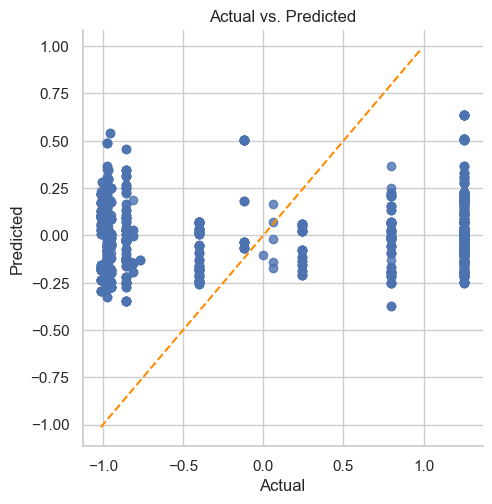

In [3202]:
# Checking for Linear Relationship
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

def linear_assumption(model, features, label):
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()
    
linear_assumption(model_mul3, X_test4, y_test4)

Assumption: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


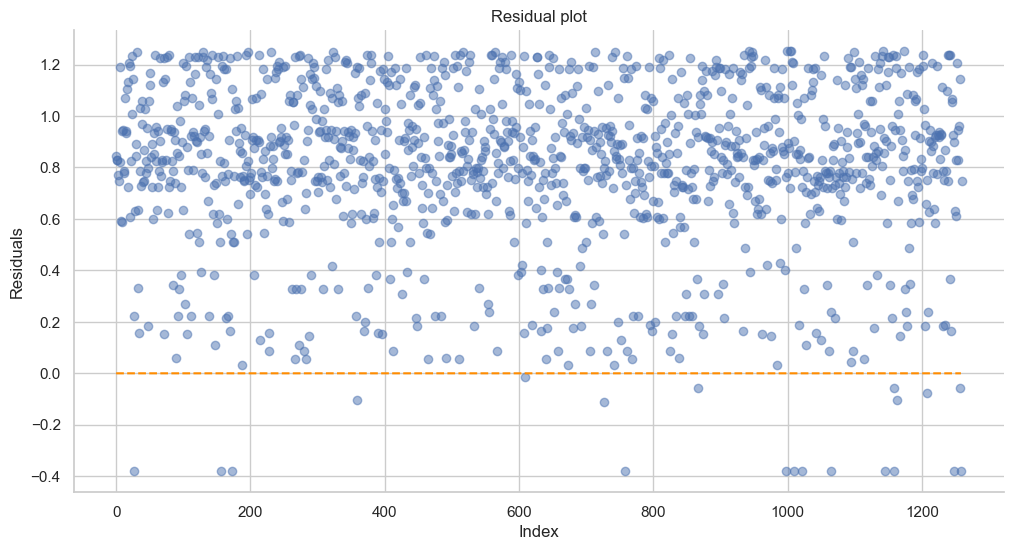

In [3203]:
# Checking Homoscedasticity: Plot the residuals of linear regression
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    #print(df_results)
    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residual plot')
    plt.xlabel('Index')
    plt.ylabel('Residuals')
    plt.show() 

homoscedasticity_assumption(model_mul3, X_test4, y_test4)

Interpretation- We observe an uneven spread of residuals, most are above and very few are below the zero line across all indices, so there is no evidence of homoscedasticity.

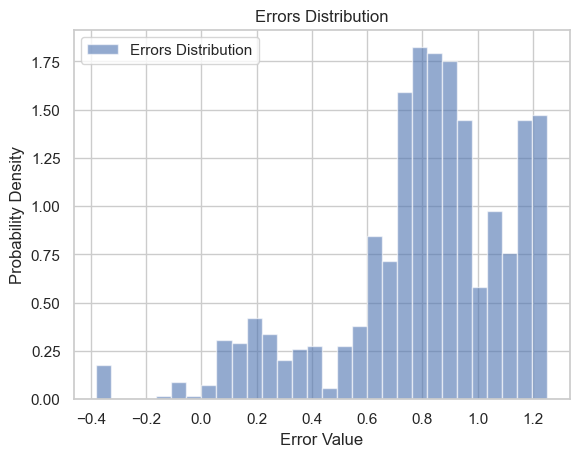

In [3205]:
# Error Normality Curve
df3_results = calculate_residuals(model_mul3, X_test4, y_test4)
plt.hist(df3_results.Residuals, density=True, bins=30, alpha=0.6, label='Errors Distribution')  # Plot errors histogram
plt.xlabel('Error Value')
plt.ylabel('Probability Density')
plt.title('Errors Distribution')
plt.legend()
plt.grid(True)
plt.show()

Interpretation- Error distribution curve doesn't show much normality in nature.

#### 3. Predicting new data

In [3208]:
# Reshape the new data into a 2D array for prediction
new4_data_array = np.reshape(new3_data_df[["away_club_goals", "goals", "minutes_played", "home_club_goals"]], (1, -1))

In [3209]:
# Predict the target value for the new data
predicted_value2 = model_mul3.predict(new4_data_array)

# Print the predicted value
print("Predicted value for the new data:", predicted_value2[0])

Predicted value for the new data: 0.17497283844674597


In [3210]:
# Original value of the new data
new3_data_df['market_value_in_eur']

4198   -1.014459
Name: market_value_in_eur, dtype: float64

#### Interpretation-

------------------    
##### Assumptions:
    
Non-existance of multicollinearity among independent features.
Residual Analysis: Analyzed the distribution of residuals (errors) to check for normality which meets the assumption.

Based on the evaluation scores provided, here's an interpretation of the multiple linear regression model's performance for predicting market_value_in_eur:

------------------    
##### Very High Error with Improvement over Single-Variable Model:

MSE (Mean Squared Error) = 0.9633: This value indicates a slightly lower error compared to the previous model (MSE was 0.9673). A very high MSE suggests the model makes predictions that are far from the actual market_value_in_eur on average.

MAE (Mean Absolute Error) = 0.9814: Similar to MSE, this is lower than previous MAE of 0.9835, indicating a slight reduction in the average absolute difference between predicted and actual market_value_in_eur.

RMSE (Root Mean Squared Error) = 0.9255: The RMSE is higher than the previous value of 0.9299, signifying an increase in the average magnitude of the errors in market_value_in_eur prediction.

------------------    
##### Improved Correlation:

R-Squared (R²) = 0.022: This value is higher than the previous R-Squared of 0.0179, suggesting a slight improvement. An R-Squared of 0.022 indicates that the model explains around 2.2% of the variability in market_value_in_eur based on away_club_goals, goals, minutes_played, home_club_goals. This represents a slightly stronger correlation between these combined factors and market_value_in_eur compared to using away_club_goals alone.

------------------    
##### Overall Interpretation:

This multiple linear regression model shows better performance compared to a potential single-variable model using only away_club_goals. The errors (MSE, MAE, RMSE) have decreased a little, indicating more accurate market_value_in_eur predictions on average. The R-Squared value has also increased slightly, suggesting that incorporating away_club_goals, goals, minutes_played, home_club_goals together explains a larger portion of the market_value_in_eur variation.

Y = 0.0123 + 0.14 * X1 +  0.05 * X2 + 0.06 * X3 +  0.05 * X4

------------------    
##### In Conclusion:

This multiple linear regression model demonstrates a clear improvement in market_value_in_eur prediction accuracy and captures a larger portion of the influencing factors compared to a potential single-variable model also meets required assumptions. But this is still extremely poor model to use for market_value_in_eur prediction. Classification models should be tried for market_value_in_eur prediction.

## Sprint 6- Solving Business Questions- Team Comparison

### Is there a statistically significant difference in the average home_club_goals and away_club_goals scored? Assuming that the goals are normally distributed and that the population variances are approximately equal. Using a 5% significance level to test this hypothesis.

Null and Alternate hypothesis to determine if the average home_club_goals and away_club_goals scored differ significantly from each other and the type of tailed-test to be performed-

1. HO: there is no significant difference in the average home_club_goals and away_club_goals scored.
2. HA: there is significant difference in the average home_club_goals and away_club_goals scored.
3. Using Symbols: H0: μ1 - μ2 = 0, HA: μ1 - μ2 ≠ 0.
4. Two sample two tailed hypothesis t-test is to be performed.

In [3215]:
# Calculate the sample statistics for home_club_goals and away_club_goals using simple random sampling without replacement
# Sample 25 rows randomly from the merged_data DataFrame
goal_sample_data = merged_data.sample(n=25, random_state=1)

# Extract home and away goals from the sampled data
home_sample = goal_sample_data['home_club_goals']
away_sample = goal_sample_data['away_club_goals']

x1=st.mean(home_sample)
x2=st.mean(away_sample)
sd1=st.stdev(home_sample)
sd2=st.stdev(away_sample)
v1=(st.stdev(home_sample))**2
v2=(st.stdev(away_sample))**2
n1=len(home_sample)
n2=len(away_sample)
df= n1+n2-2

print("Sample mean of home_sample =",x1)
print("Sample mean of away_samplee =",x2)
print("Sample SD of home_sample =",sd1)
print("Sample SD of away_sample =",sd2)
print("Sample variance of home_sample =",v1)
print("Sample variance of away_sample =",v2)
print("Sample size of home_sample =",n1)
print("Sample size of away_sample =",n2)
print('Degrees of freedom =',df)

Sample mean of home_sample = 1.84
Sample mean of away_samplee = 1.32
Sample SD of home_sample = 1.312757911167681
Sample SD of away_sample = 1.3140268896284681
Sample variance of home_sample = 1.7233333333333332
Sample variance of away_sample = 1.7266666666666663
Sample size of home_sample = 25
Sample size of away_sample = 25
Degrees of freedom = 48


In [3216]:
alpha = 0.05 # Significance level 
# As this is a two tailed test, we have to consider alpha/2 i.e. 0.025.

# For alpha = 0.05, calculate the critical value of the hypothesis test
t_critical = t.ppf(1-0.025, df)
print('t-critical =',t_critical)

# Calculate the test statistic and p-value for the hypothesis test
signal = abs(x1-x2)
noise = math.sqrt(v1*(n1-1) + v2*(n2-1))*math.sqrt(1/n1 + 1/n2)
t_statistic = signal/noise
print('t-statistic =',t_statistic)

p_value = t.sf(abs(t_statistic),df)*2 #considering two tails
print("p-value = ", p_value)

t-critical = 2.010634757624232
t-statistic = 0.202042708452068
p-value =  0.840737220874958


As per, decision rule:

1. p-value < alpha : Rejection of Null Hypothesis (H0)
2. If -t-critical > t-statistic > +t-critical : Rejection of Null Hypothesis(H0)

In our study,

1. p-value = 0.84 > alpha = 0.05, which leads to acceptance of Null Hypothesis.
2. t-statistic = 0.202 < +t-critical = 2.01, which leads to acceptance of Null Hypothesis.

#### Interpretation-

We accept the null hypothesis as there is no significant difference in the average home_club_goals and away_club_goals scored and the hypothesis testing process identifies the same.

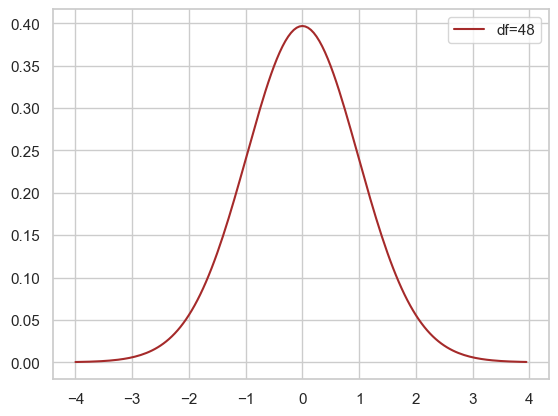

In [3219]:
# Plotting the t-distribution
x=np.arange(-4,4,.05)
tvals48=t.pdf(x,48)
plt.plot(x,tvals48,color='brown')
plt.legend(['df=48'])
plt.show()

## Sprint 7- Solving Business Questions- Attendance and Stadium Analysis

### K-Nearest Neighbor (KNN) classification for predicting Attendance

In [3222]:
knn_df = merged_data[['attendance', 'competition_type', 'stadium', 'goals', 'player_name_y', 'season']]
knn_df

,attendance,competition_type,stadium,goals,player_name_y,season
0,45033.0,domestic_league,Max-Morlock-Stadion,0,Timothy Chandler,2012
1,45033.0,domestic_league,Max-Morlock-Stadion,0,Timothy Chandler,2012
2,45033.0,domestic_league,Max-Morlock-Stadion,0,Timothy Chandler,2012
3,45033.0,domestic_league,Max-Morlock-Stadion,0,Timothy Chandler,2012
4,45033.0,domestic_league,Max-Morlock-Stadion,0,Timothy Chandler,2012
...,...,...,...,...,...,...
4194,3200.0,domestic_league,Olympisch Stadion,1,Joseph Efford,2020
4195,3200.0,domestic_league,Olympisch Stadion,1,Joseph Efford,2020
4196,3200.0,domestic_league,Olympisch Stadion,1,Joseph Efford,2020
4197,3200.0,domestic_league,Olympisch Stadion,1,Joseph Efford,2020


#### 1. Label Encoding

In [3224]:
# Encoding competition_type variable 
purpose_encoder = preprocessing.LabelEncoder()
purpose_encoder.fit(knn_df['competition_type'])
print(purpose_encoder.classes_)
knn_df['competition_type.enc'] = purpose_encoder.transform(knn_df['competition_type'])

['domestic_cup' 'domestic_league' 'international_cup' 'other']


In [3225]:
# Encoding stadium variable 
purpose_encoder = preprocessing.LabelEncoder()
purpose_encoder.fit(knn_df['stadium'])
print(purpose_encoder.classes_)
knn_df['stadium.enc'] = purpose_encoder.transform(knn_df['stadium'])

[' Bremer Brucke' 'AFAS Stadion' 'AMEX Stadium' 'Aalborg Portland Park'
 'Allianz Arena' 'Allianz Riviera' 'Anfield'
 'Argosstadion Achter de Kazerne' 'Audi Sportpark' 'BUKO Stadion'
 'BayArena' 'Blue Water Arena' 'Bramall Lane' 'Brondby Stadium'
 'Carrow Road' 'Cegeka Arena' 'Celtic Park' 'Ceres Park'
 'Civitas Metropolitano' 'Commerzbank Arena'
 'Constant Vanden Stock Stadion' 'Craven Cottage' 'DS Arena'
 'Daknamstadion' 'Decathlon Arena-Stade Pierre-Mauroy' 'Diaz Arena'
 'Dreisamstadion' 'Edmund-Plambeck-Stadion' 'Ernst-Abbe-Sportfeld'
 'Erve Asito' 'Etihad Stadium' 'Euroborg' 'Fortuna Sittard Stadion'
 'Freethielstadion' 'Friedrich Ludwig Jahn Sportpark'
 'GP Stadion am Hardtwald' 'Ghelamco Arena' 'Groupama Stadium'
 'Guldensporenstadion' 'Heinz-von-Heiden-Arena' 'Helsingor Stadium'
 'Herfolge stadium' 'Het Kuipje' 'Home Deluxe Arena' 'JYSK Park'
 'Jahnstadion Regensburg' 'Jan-Breydel-Stadion' 'Johan Cruijff ArenA'
 'King Power Stadium' 'Koning Willem II Stadion' 'Le Canonnier'
 'L

In [3226]:
# Encoding player_name_y variable 
purpose_encoder = preprocessing.LabelEncoder()
purpose_encoder.fit(knn_df['player_name_y'])
print(purpose_encoder.classes_)
knn_df['player_name_y.enc'] = purpose_encoder.transform(knn_df['player_name_y'])

['Andrija Novakovich' 'Caleb Stanko' 'Christian Cappis'
 'Christian Pulisic' 'Desevio Payne' 'Emmanuel Sabbi' 'Erik Palmer-Brown'
 'Giovanni Reyna' 'John Anthony Brooks' 'Jonathan Amon' 'Jordan'
 'Joseph Efford' 'Josh Sargent' 'Julian Green' 'Kenny Saief'
 'Luca de la Torre' 'Lynden Gooch' 'Sergino Dest' 'Terrence Boyd'
 'Tim Ream' 'Timothy Chandler' 'Timothy Weah' 'Tyler Adams'
 'Weston McKennie']


In [3227]:
# Define categories (bins) and labels for attendance column
knn_df['attendance_c'] = np.where(knn_df['attendance'] > knn_df['attendance'].median(), 'High attendance', 'Low attendance')
# Print the number of unique values
print(f"Number of unique values: {log1_df['attendance_c'].unique()}")

Number of unique values: ['High attendance' 'Low attendance']


In [3228]:
# Encoding attendance_c variable
attendance_encoder = preprocessing.LabelEncoder()
attendance_encoder.fit(knn_df['attendance_c'])
print(attendance_encoder.classes_)
knn_df['attendance.enc'] = attendance_encoder.transform(knn_df['attendance_c'])

['High attendance' 'Low attendance']


In [3229]:
# Removing competition_type, stadium, player_name_y, attendance columns from the data
columns_to_drop = ["competition_type", "stadium", "player_name_y", "attendance"]
knn_df = knn_df.drop(columns_to_drop, axis=1)
knn_df

,goals,season,competition_type.enc,stadium.enc,player_name_y.enc,attendance_c,attendance.enc
0,0,2012,1,60,20,High attendance,0
1,0,2012,1,60,20,High attendance,0
2,0,2012,1,60,20,High attendance,0
3,0,2012,1,60,20,High attendance,0
4,0,2012,1,60,20,High attendance,0
...,...,...,...,...,...,...,...
4194,1,2020,1,72,11,Low attendance,1
4195,1,2020,1,72,11,Low attendance,1
4196,1,2020,1,72,11,Low attendance,1
4197,1,2020,1,72,11,Low attendance,1


In [3230]:
# Retrieving competition_type.enc and attendance.enc column from the dataset and storing into another dataframe
attcomp_col_df = pd.DataFrame(knn_df[['attendance.enc', 'competition_type.enc']])

# Removing attendance.enc column from the dataset as scaling is not required for this column
new2_df = pd.DataFrame(knn_df.drop(['attendance.enc', 'competition_type.enc'], axis=1))

#### 2. Outlier Assessment and Treatment

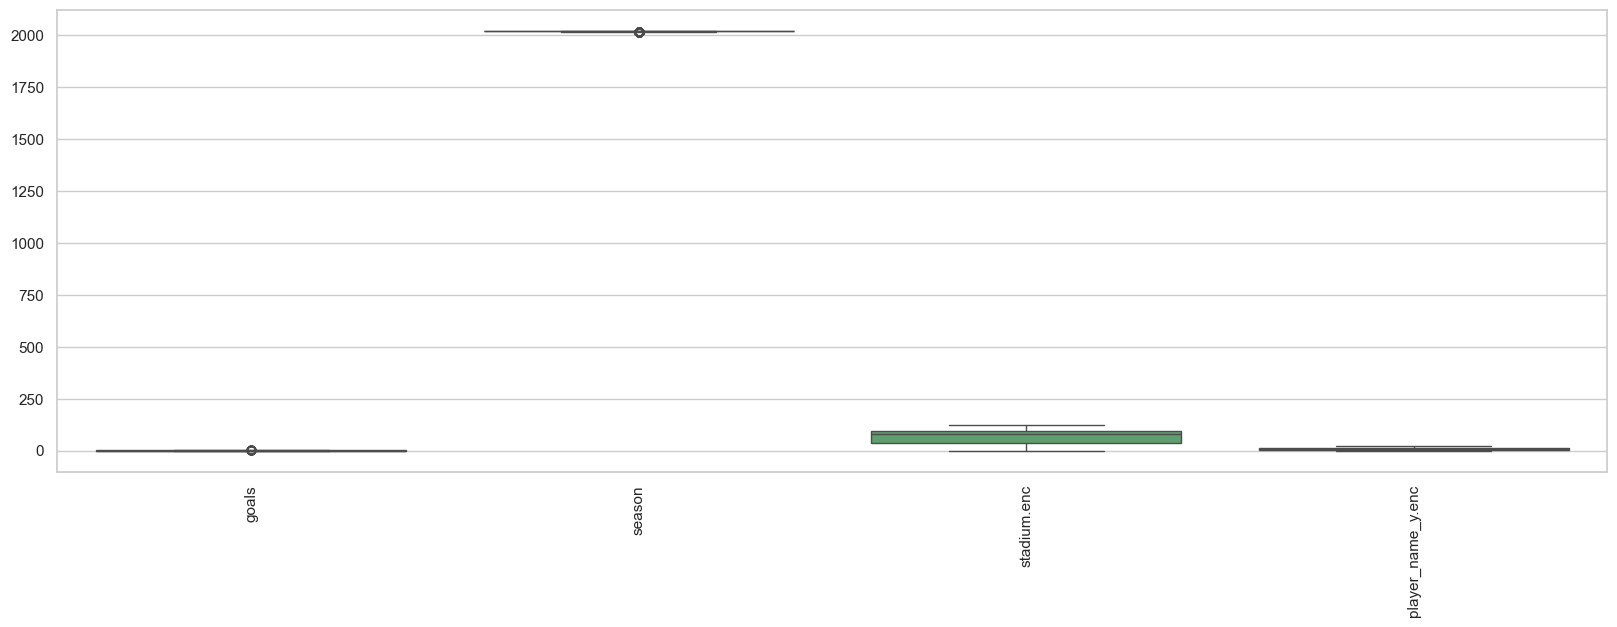

In [3232]:
# Outlier Assessment
sns.boxplot(data=new2_df)  # All columns by default
plt.gcf().set_size_inches(20, 6)
plt.xticks(rotation=90)
plt.show()

Interpretation- Data exists with outliers.

In [3234]:
# Outlier Treatment
def iqr_winsorization(df, thresh=1.5):
    df_numeric = df.select_dtypes(include=[np.number])  # Select numeric columns
    columns_to_treat = df_numeric.columns

    for col in columns_to_treat:
        Q1 = df_numeric[col].quantile(0.25)
        Q3 = df_numeric[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define fences
        lower_fence = Q1 - thresh * IQR
        upper_fence = Q3 + thresh * IQR

        # Winsorize outliers
        df_numeric.loc[df_numeric[col] < lower_fence, col] = lower_fence
        df_numeric.loc[df_numeric[col] > upper_fence, col] = upper_fence

    return df_numeric

df = pd.DataFrame(new2_df)
# Perform outlier treatment on all columns
new2_treated_df = iqr_winsorization(df.copy())
print(new2_treated_df)

      goals  season  stadium.enc  player_name_y.enc
0       0.0    2014           60               20.0
1       0.0    2014           60               20.0
2       0.0    2014           60               20.0
3       0.0    2014           60               20.0
4       0.0    2014           60               20.0
...     ...     ...          ...                ...
4194    1.0    2020           72               11.0
4195    1.0    2020           72               11.0
4196    1.0    2020           72               11.0
4197    1.0    2020           72               11.0
4198    1.0    2020           72               11.0

[4199 rows x 4 columns]


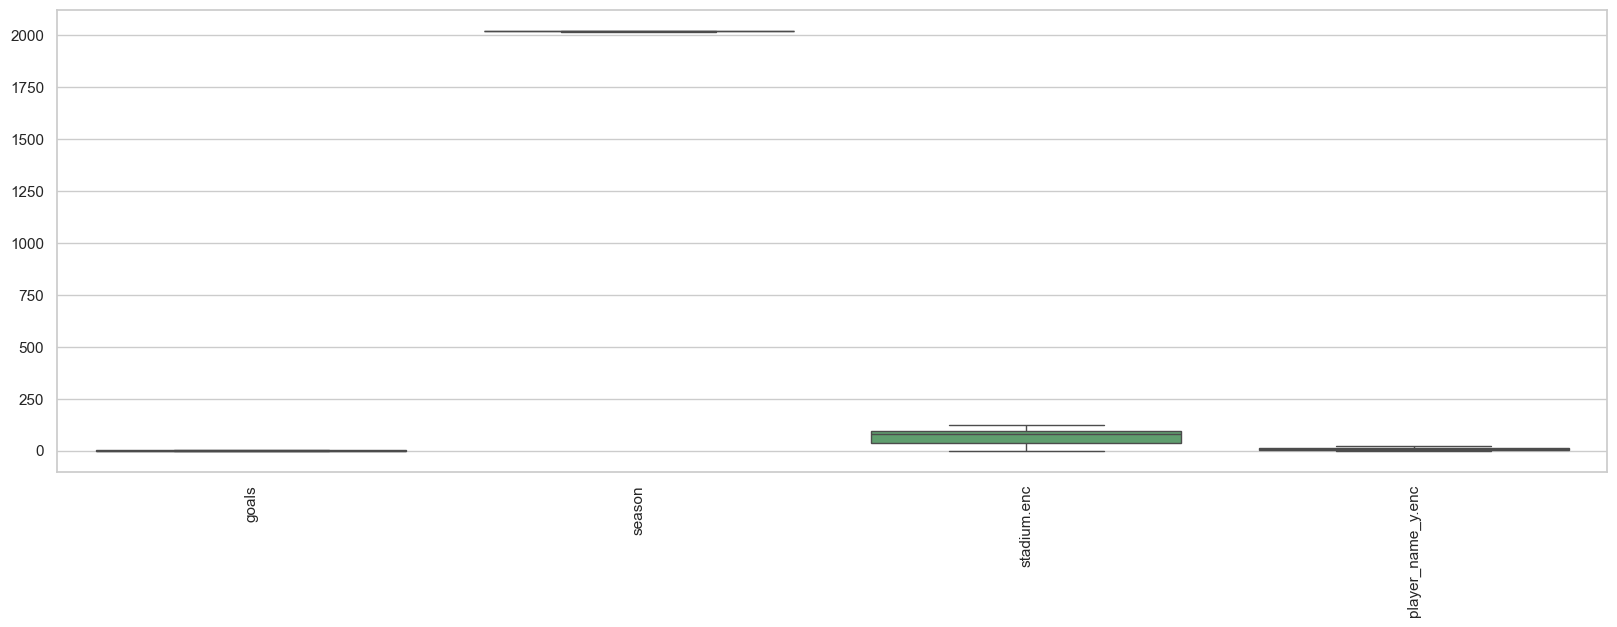

In [3235]:
# Outlier Assessment after Outlier Treatment
sns.boxplot(data=new2_treated_df)  # All columns by default
plt.gcf().set_size_inches(20, 6)
plt.xticks(rotation=90)
plt.show()

Interpretation- No outliers exist in the dataset post outlier treatment.

#### 3. Scaling Data

In [3238]:
cols = new2_treated_df.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(new2_treated_df)
df_scaled = pd.DataFrame(df_scaled, columns=cols)
df_scaled.head()

,goals,season,stadium.enc,player_name_y.enc
0,-0.733861,-2.176423,-0.261157,1.544203
1,-0.733861,-2.176423,-0.261157,1.544203
2,-0.733861,-2.176423,-0.261157,1.544203
3,-0.733861,-2.176423,-0.261157,1.544203
4,-0.733861,-2.176423,-0.261157,1.544203


In [3239]:
# Append the competition_type.enc and attendance.enc column to the scaled DataFrame
df_scaled=pd.concat([df_scaled , attcomp_col_df], axis=1)
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   goals                 4199 non-null   float64
 1   season                4199 non-null   float64
 2   stadium.enc           4199 non-null   float64
 3   player_name_y.enc     4199 non-null   float64
 4   attendance.enc        4199 non-null   int32  
 5   competition_type.enc  4199 non-null   int32  
dtypes: float64(4), int32(2)
memory usage: 164.2 KB


#### 4. Checking Multicollinearity among independent variables for final feature selection

In [3241]:
# Selecting the cutoff value as 0.7
abs(df_scaled.corr())>=0.7 # ignored the dependent column for scaling

,goals,season,stadium.enc,player_name_y.enc,attendance.enc,competition_type.enc
goals,True,False,False,False,False,False
season,False,True,False,False,False,False
stadium.enc,False,False,True,False,False,False
player_name_y.enc,False,False,False,True,False,False
attendance.enc,False,False,False,False,True,False
competition_type.enc,False,False,False,False,False,True


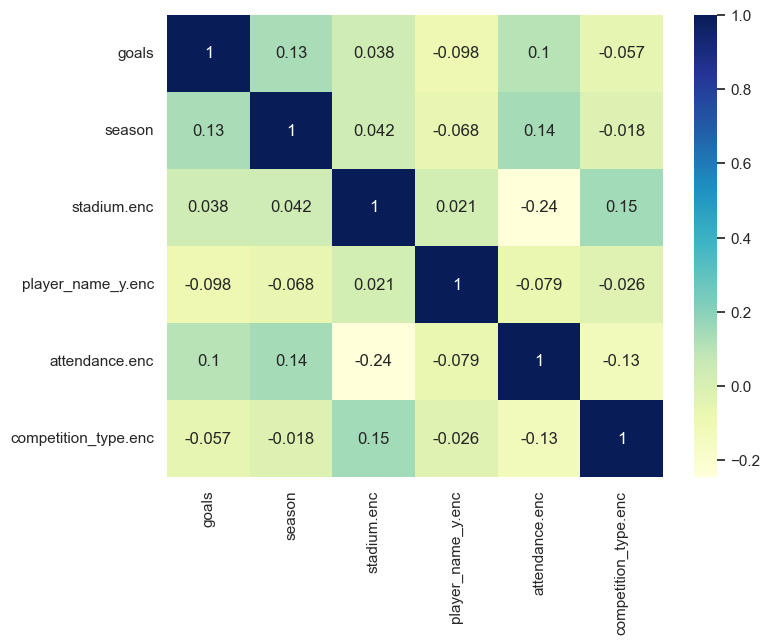

In [3242]:
# Plotting heatmap
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.heatmap(df_scaled.corr(), annot=True, cmap="YlGnBu")
#plt.savefig('corr_heatmap.png')  # Save the plot
plt.show()

Interpretation- None of the variables have high correlation to each other (correlation absolute values are <0.70).

#### 5. Preparation of training and test datasets

In [3245]:
# Creating test and training datasets
attn_train, attn_test = train_test_split(df_scaled,train_size = 0.8,shuffle= True,random_state= 0)
print('Size of training dataset: ', attn_train.shape)
print('Size of test dataset: ', attn_test.shape)

Size of training dataset:  (3359, 6)
Size of test dataset:  (840, 6)


In [3246]:
X_train = attn_train.drop(columns='attendance.enc', axis =1)
Y_train = attn_train['attendance.enc']
X_test = attn_test.drop(columns='attendance.enc', axis =1)
Y_test = attn_test['attendance.enc']
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((3359, 5), (3359,), (840, 5), (840,))

#### 6. Finding Optimum K value

Minimum error:- 0.011904761904761904 at K = 1


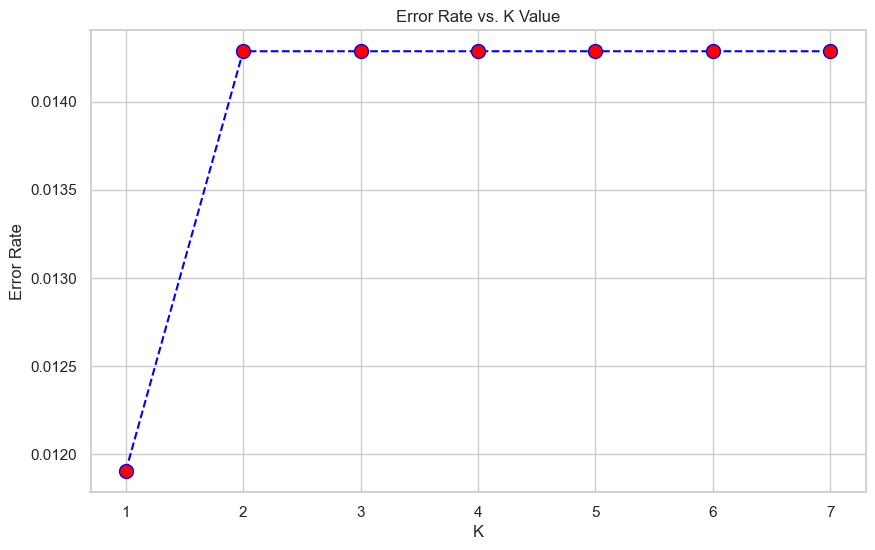

In [3248]:
from sklearn import neighbors
error_rate = []
for i in range(1,8):
    clf_food = neighbors.KNeighborsClassifier(n_neighbors=i)
    clf_food.fit(X_train,Y_train)
    pred_i = clf_food.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,8),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)
plt.show()

Interpretation: Optimum K value derived from the above error-rate plot is 3 which is ideal.

In [3250]:
k = 3

#### 7. Building the model

In [3252]:
from sklearn import neighbors

# learning the classifier
clf = neighbors.KNeighborsClassifier(k)
clf.fit(X_train, Y_train)

# Using the trained model to predict the outcome of the X_Test dataset
Y_pred = clf.predict(X_test)

In [3253]:
# Model Properties
print(clf.classes_)
print(clf.n_neighbors)

[0 1]
3


#### 8. Confusion matrix

In [3255]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_pred))
tn, fp, fn, tp = confusion_matrix(Y_test,Y_pred).ravel()
print(tn, fp, fn, tp)

[[411   1]
 [ 11 417]]
411 1 11 417


#### 9. Accuracy, Recall, F1-score, Precision

In [3257]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('accuracy:', accuracy_score(Y_test, Y_pred))#Combining the True positive and true negative cases 
#i.e records
print('recall:', recall_score(Y_test, Y_pred)) #Prediction got True negative cases
print('f1-score:', f1_score(Y_test, Y_pred)) #Prediction for True positive cases
print('precision:', precision_score(Y_test, Y_pred))# Prediction fot True positive cases

accuracy: 0.9857142857142858
recall: 0.9742990654205608
f1-score: 0.9858156028368794
precision: 0.9976076555023924


#### 10. ROC-AUC

In [3259]:
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(Y_test, clf.predict_proba(X_test)[:,1])
print('roc:', roc)

roc: 0.9882667180836584


<Figure size 1000x800 with 0 Axes>

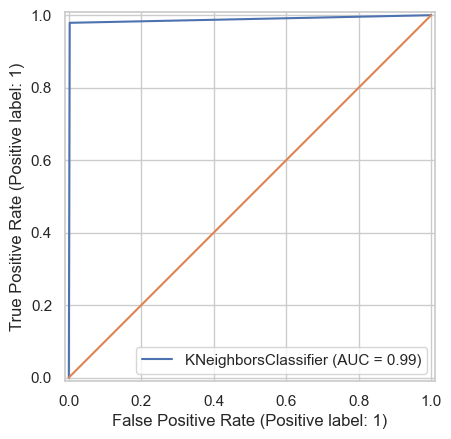

In [3260]:
# ROC curve
#from sklearn.metrics import plot_roc_curve 
#from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(10,8))
#plot_roc_curve(logreg,X_test,Y_test, color='orange')
RocCurveDisplay.from_estimator(clf, X_test, Y_test)
plt.plot([0,1],[0,1])
#plt.savefig('roc_knn.png')  # Save the plot
plt.show()

#### Interpretation-

##### Overall Performance:

Accuracy (0.9857): The model appears to have very high accuracy in classifying high and low attendance overall. However, accuracy alone can be misleading, so we need to consider other metrics.

------------------
##### Specific Class Performance (low attendance):

Recall (0.9742): Recall measures the model's ability to identify true positives (low attendance). A very high recall of 0.9742 suggests the model successfully identifies about 97.42% of the actual positive cases.

Precision (0.9976): Precision tells you the proportion of positive predictions (identifying low attendance) that are actually correct. A value of 0.9976 indicates that almost all of the times attendance flagged as low by the model would actually be low. In combination with the high recall, it suggests the model might be generating very few false positives (identifying high attendance as low).

F1-score (0.9858):  This metric combines precision and recall, and its very high value (0.9858) reinforces the points highlighted above: the model excels in correctly classify low attendance, which is crucial for attendance assessment.

ROC Score (0.9882):  While not perfect, a score of 0.9882 on the ROC curve indicates very good ability to distinguish between low and high attendance. It's closer to perfect performance (1.0).

------------------
##### Key Takeaways:

a. All scores (accuracy, recall, precision, F1-score, and ROC AUC) are very high (around 0.97-0.99) suggests that the model performs extremely well in both identifying relevant cases (recall) and making accurate positive predictions (precision). This indicates a balanced classification where the model is neither over-predicting nor under-predicting the positive class.

b. A score of 0.9857 on a classification model translates to approximately 98.57% accuracy, which indicates great performance and suggests a promising classification model.

c. The ROC score further emphasizes the model's overall performance being much better than random chance, but still not perfect (1).

d. This KNN classification model's performance is excellent for attendance assessment in comparison to the logistic regression model we built which was average in performance.

------------------
##### Recommendations: 

a. Look for potential problems with the data used to train the model. Imbalanced class distribution (e.g., significantly fewer low attendance compared to high attendance) can lead to models that prioritize the majority class and perform poorly on the minority class (low attendance in this case).

## Sprint 9- Solving Business Questions- Event Analysis

### Is there a statistically significant difference in the average goals scored by right foot and left foot? Assuming that the goals are normally distributed and that the population variances are approximately equal. Using a 5% significance level to test this hypothesis.

Null and Alternate hypothesis to determine if there is a statistically significant difference in the average goals scored by right foot and left foot and the type of tailed-test to be performed-

1. HO: there is no significant difference in the average goals scored by right foot and left foot.
2. HA: there is significant difference in the average goals scored by right foot and left foot.
3. Using Symbols: H0: μ1 - μ2 = 0, HA: μ1 - μ2 ≠ 0.
4. Two tailed hypothesis z-test is to be performed.

In [3265]:
# Calculate the sample statistics for goals scored by right foot using simple random sampling without replacement
right_sample = merged_data[merged_data['foot'] == 'right']['goals'].sample(n=100, random_state=1)
n1 = len(right_sample)
s_mean1 = st.mean(right_sample)
s_sd1 = st.stdev(right_sample)
s_var1 = s_sd1**2
print('Sample of goals scored by right foot:')
print('Mean = ' +str(s_mean1))
print('Standard Deviation = ' +str(s_sd1))
print('Sample Size = ' +str(n1))
print('Variance = ' +str(s_var1))

# Calculate the sample statistics for goals scored by left foot using simple random sampling without replacement
left_sample = merged_data[merged_data['foot'] == 'left']['goals'].sample(n=100, random_state=1)
n2 = len(left_sample)
s_mean2 = st.mean(left_sample)
s_sd2 = st.stdev(left_sample)
s_var2 = s_sd2**2
print('\nSample of goals scored by left foot:')
print('Mean = ' +str(s_mean2))
print('Standard Deviation = ' +str(s_sd2))
print('Sample Size = ' +str(n2))
print('Variance = ' +str(s_var2))

Sample of goals scored by right foot:
Mean = 0.45
Standard Deviation = 0.6415731927193978
Sample Size = 100
Variance = 0.4116161616161616

Sample of goals scored by left foot:
Mean = 0.29
Standard Deviation = 0.45604802157206864
Sample Size = 100
Variance = 0.207979797979798


In [3266]:
# For alpha = 0.05, calculate the critical value of the hypothesis test
alpha=0.05
z_critical = norm.ppf(1 - alpha/2) # two tailed test
print("z-critical = "+str(z_critical))

# Calculate the test statistic and p-value for the hypothesis test
z_statistics = ((s_mean1 - s_mean2)- 0) / (math.sqrt(s_var1/n1 + s_var2/n2)) 
print("z-statistics = ", z_statistics)

p_value = norm.sf(abs(z_statistics))*2 #two tailed test
print("p-value = "+str(p_value))

z-critical = 1.959963984540054
z-statistics =  2.0326644613709317
p-value = 0.04208643409948821


As per, decision rule:

1. If p-value < alpha, Rejection of null hupothesis HO
2. If -z-critical > z-statistics > +z-critical, Rejection of null hupothesis HO

In our study,

1. p-value = 0.042 < alpha = 0.05, which leads to rejection of Null Hypothesis.
2. z-statistics = 2.032 > +z-critical = 1.959, which leads to rejection of Null Hypothesis.

#### Interpretation-

We reject the null hypothesis as there is significant difference in the average goals scored by right foot and left foot and the hypothesis testing process identifies the same.

## Sprint 10- Solving Business Questions- Player Attributes and Demographics

### K-Means Clustering classification for predicting Foot

In [3271]:
kmc_df = merged_data[['market_value_in_eur', 'country_of_birth', 'height_in_cm', 'foot', 'number', 'age']]
kmc_df

,market_value_in_eur,country_of_birth,height_in_cm,foot,number,age
0,700000.0,Germany,186.0,right,22,34
1,700000.0,Germany,186.0,right,22,34
2,700000.0,Germany,186.0,right,22,34
3,700000.0,Germany,186.0,right,22,34
4,700000.0,Germany,186.0,right,22,34
...,...,...,...,...,...,...
4194,300000.0,United States,176.0,right,11,28
4195,300000.0,United States,176.0,right,28,28
4196,300000.0,United States,176.0,right,28,28
4197,300000.0,United States,176.0,right,28,28


#### 1. Label Encoding

In [3273]:
# Encoding country_of_birth variable 
purpose_encoder = preprocessing.LabelEncoder()
purpose_encoder.fit(kmc_df['country_of_birth'])
print(purpose_encoder.classes_)
kmc_df['country_of_birth.enc'] = purpose_encoder.transform(kmc_df['country_of_birth'])

['England' 'Germany' 'Italy' 'Netherlands' 'United States']


In [3274]:
# Encoding foot variable 
purpose_encoder = preprocessing.LabelEncoder()
purpose_encoder.fit(kmc_df['foot'])
print(purpose_encoder.classes_)
kmc_df['foot.enc'] = purpose_encoder.transform(kmc_df['foot'])

['both' 'left' 'right']


In [3275]:
# Removing country_of_birth, foot columns from the data
columns_to_drop = ["country_of_birth", "foot"]
kmc_df = kmc_df.drop(columns_to_drop, axis=1)
kmc_df

,market_value_in_eur,height_in_cm,number,age,country_of_birth.enc,foot.enc
0,700000.0,186.0,22,34,1,2
1,700000.0,186.0,22,34,1,2
2,700000.0,186.0,22,34,1,2
3,700000.0,186.0,22,34,1,2
4,700000.0,186.0,22,34,1,2
...,...,...,...,...,...,...
4194,300000.0,176.0,11,28,4,2
4195,300000.0,176.0,28,28,4,2
4196,300000.0,176.0,28,28,4,2
4197,300000.0,176.0,28,28,4,2


In [3276]:
# Retrieving foot.enc column from the dataset and storing into another dataframe
foot_col_df = pd.DataFrame(kmc_df[['foot.enc']])

# Removing attendance.enc column from the dataset as scaling is not required for this column
new3_df = pd.DataFrame(kmc_df.drop(['foot.enc'], axis=1))

#### 2. Outlier Assessment and Treatment

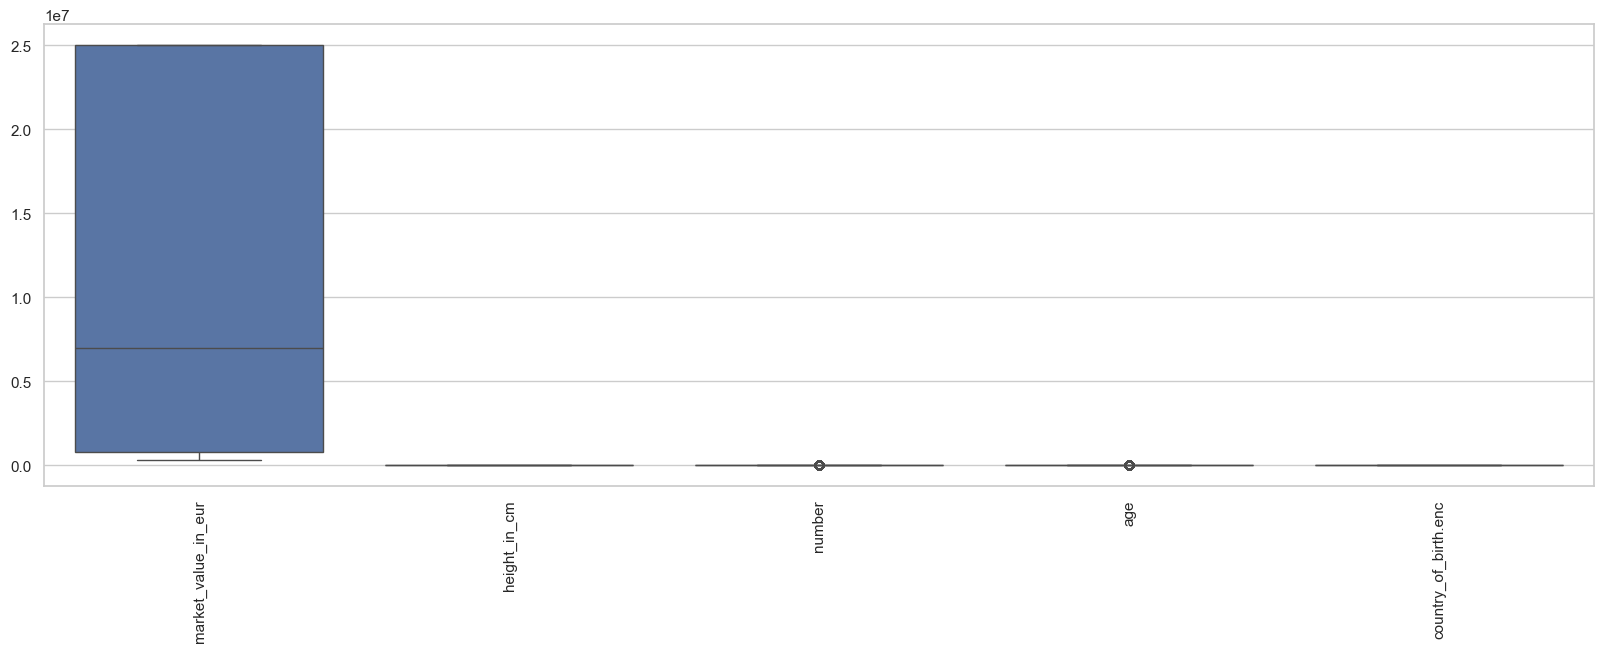

In [3278]:
# Outlier Assessment
sns.boxplot(data=new3_df)  # All columns by default
plt.gcf().set_size_inches(20, 6)
plt.xticks(rotation=90)
plt.show()

Interpretation- Data exists with outliers.

In [3280]:
# Outlier Treatment
def iqr_winsorization(df, thresh=1.5):
    df_numeric = df.select_dtypes(include=[np.number])  # Select numeric columns
    columns_to_treat = df_numeric.columns

    for col in columns_to_treat:
        Q1 = df_numeric[col].quantile(0.25)
        Q3 = df_numeric[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define fences
        lower_fence = Q1 - thresh * IQR
        upper_fence = Q3 + thresh * IQR

        # Winsorize outliers
        df_numeric.loc[df_numeric[col] < lower_fence, col] = lower_fence
        df_numeric.loc[df_numeric[col] > upper_fence, col] = upper_fence

    return df_numeric

df = pd.DataFrame(new3_df)
# Perform outlier treatment on all columns
new3_treated_df = iqr_winsorization(df.copy())
print(new3_treated_df)

      market_value_in_eur  height_in_cm  number  age  country_of_birth.enc
0                700000.0         186.0    22.0   31                     1
1                700000.0         186.0    22.0   31                     1
2                700000.0         186.0    22.0   31                     1
3                700000.0         186.0    22.0   31                     1
4                700000.0         186.0    22.0   31                     1
...                   ...           ...     ...  ...                   ...
4194             300000.0         176.0    11.0   28                     4
4195             300000.0         176.0    28.0   28                     4
4196             300000.0         176.0    28.0   28                     4
4197             300000.0         176.0    28.0   28                     4
4198             300000.0         176.0    28.0   28                     4

[4199 rows x 5 columns]


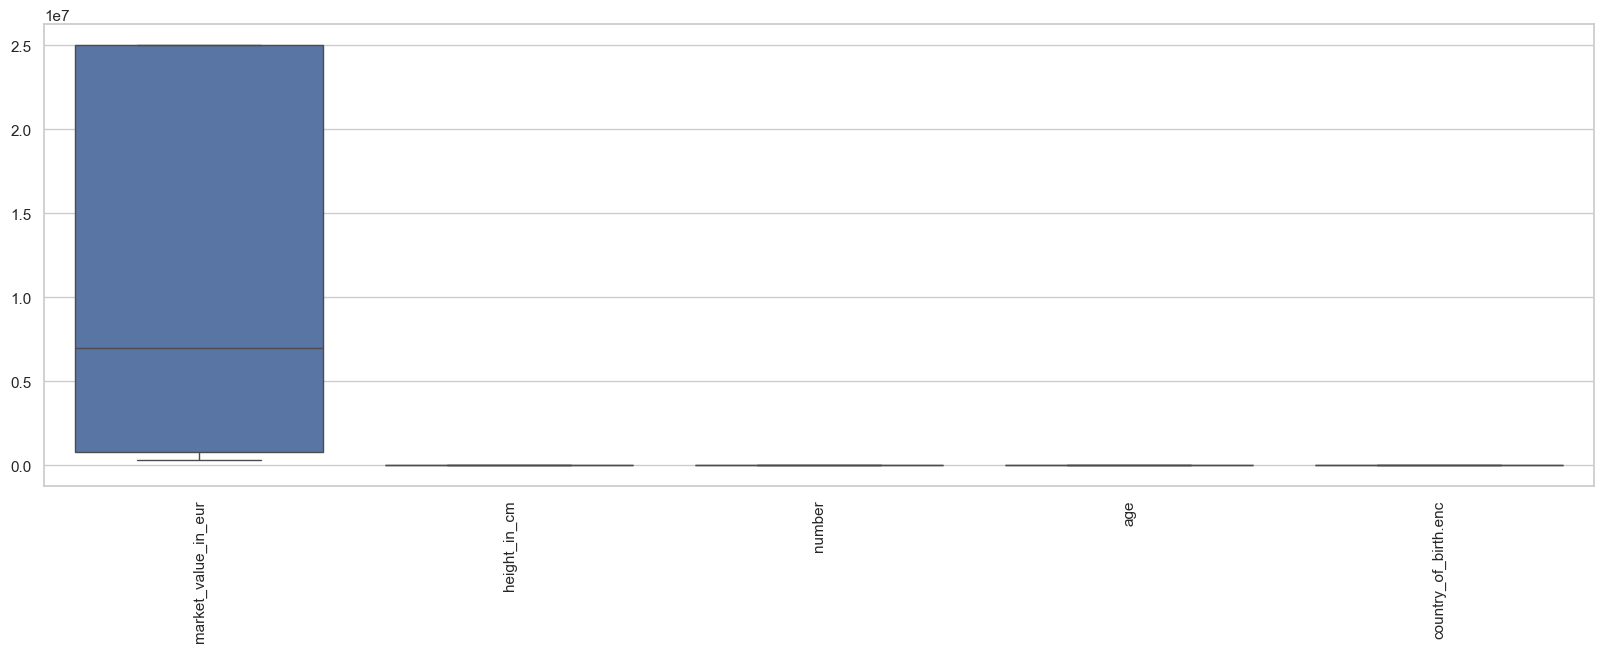

In [3281]:
# Outlier Assessment after Outlier Treatment
sns.boxplot(data=new3_treated_df)  # All columns by default
plt.gcf().set_size_inches(20, 6)
plt.xticks(rotation=90)
plt.show()

Interpretation- No outliers exist in the dataset post outlier treatment.

#### 3. Scaling Data

In [3284]:
cols = new3_treated_df.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(new3_treated_df)
df_scaled = pd.DataFrame(df_scaled, columns=cols)
df_scaled.head()

,market_value_in_eur,height_in_cm,number,age,country_of_birth.enc
0,-0.977711,0.650517,0.95033,1.66112,-1.640892
1,-0.977711,0.650517,0.95033,1.66112,-1.640892
2,-0.977711,0.650517,0.95033,1.66112,-1.640892
3,-0.977711,0.650517,0.95033,1.66112,-1.640892
4,-0.977711,0.650517,0.95033,1.66112,-1.640892


In [3285]:
# Append the competition_type.enc and attendance.enc column to the scaled DataFrame
df_scaled=pd.concat([df_scaled , foot_col_df], axis=1)
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   market_value_in_eur   4199 non-null   float64
 1   height_in_cm          4199 non-null   float64
 2   number                4199 non-null   float64
 3   age                   4199 non-null   float64
 4   country_of_birth.enc  4199 non-null   float64
 5   foot.enc              4199 non-null   int32  
dtypes: float64(5), int32(1)
memory usage: 180.6 KB


#### 4. Checking Multicollinearity among independent variables for final feature selection

In [3287]:
# Selecting the cutoff value as 0.7
abs(df_scaled.corr())>=0.7 # ignored the dependent column for scaling

,market_value_in_eur,height_in_cm,number,age,country_of_birth.enc,foot.enc
market_value_in_eur,True,False,False,False,False,False
height_in_cm,False,True,False,False,False,False
number,False,False,True,False,False,False
age,False,False,False,True,False,False
country_of_birth.enc,False,False,False,False,True,False
foot.enc,False,False,False,False,False,True


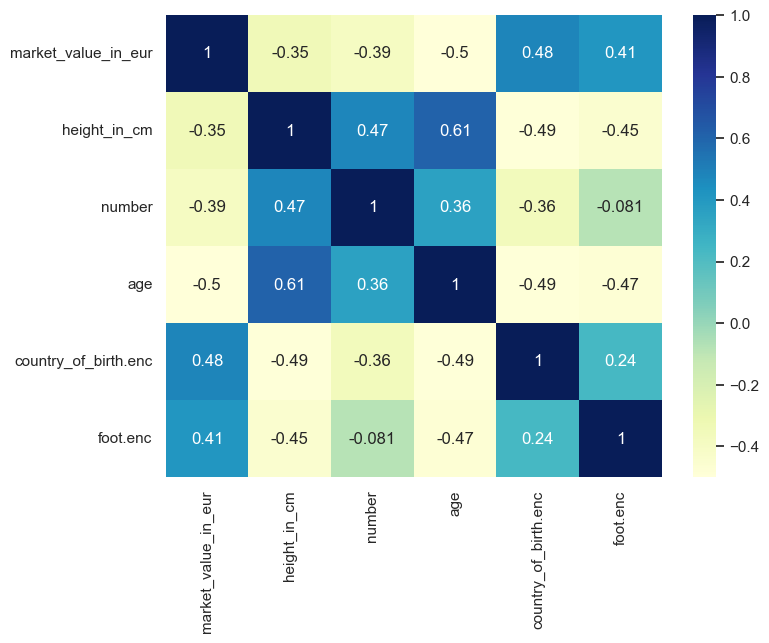

In [3288]:
# Plotting heatmap
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.heatmap(df_scaled.corr(), annot=True, cmap="YlGnBu")
plt.show()

Interpretation- None of the variables have high correlation to each other (correlation absolute values are <0.70).

#### 5. Finding the optimum value of K using Elbow Method

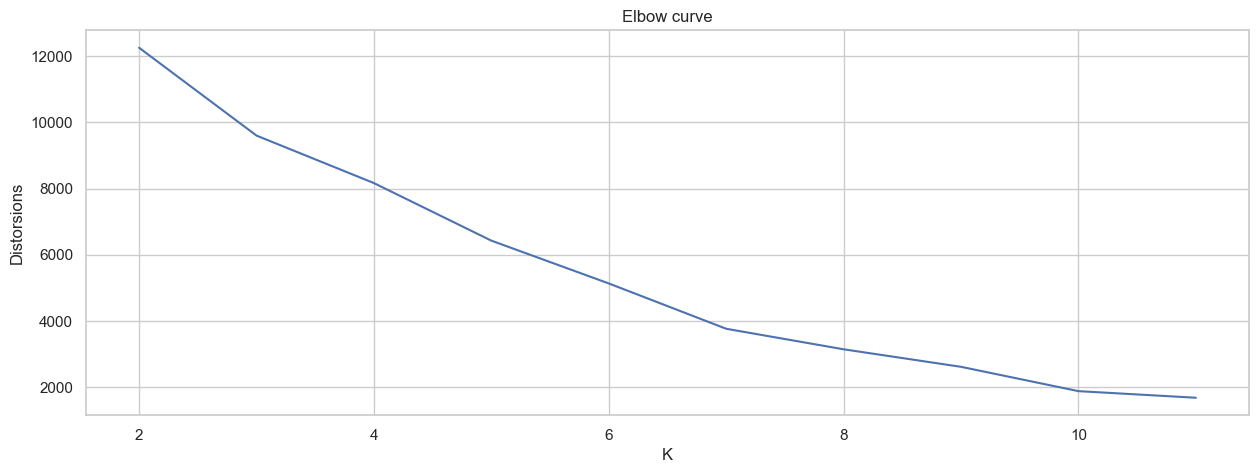

In [3291]:
distorsions = []
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 12), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve')
plt.show()

#### 6. Finding the optimum value of K and cluster efficiency using Silhouette Score

For n_clusters = 2 The average silhouette_score is : 0.5064740123869814
For n_clusters = 3 The average silhouette_score is : 0.4897173453524671
For n_clusters = 4 The average silhouette_score is : 0.5399041541800202
For n_clusters = 5 The average silhouette_score is : 0.5801712099197576
For n_clusters = 6 The average silhouette_score is : 0.5913244384739391
For n_clusters = 7 The average silhouette_score is : 0.625479274616377


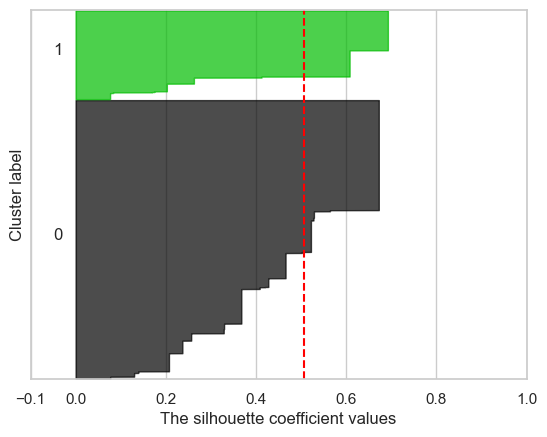

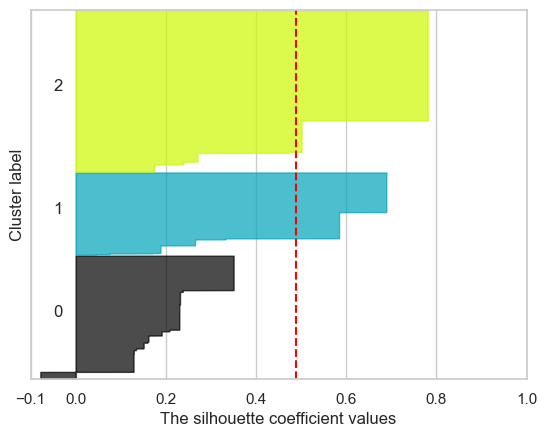

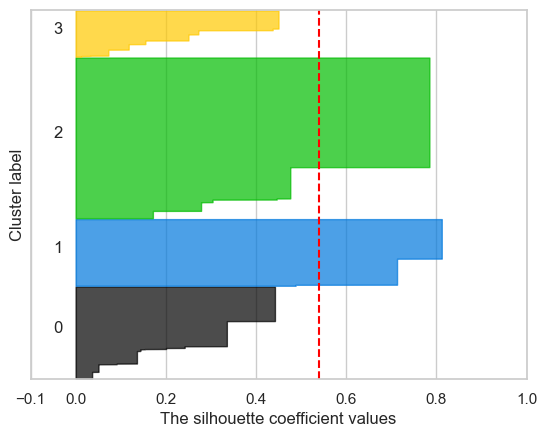

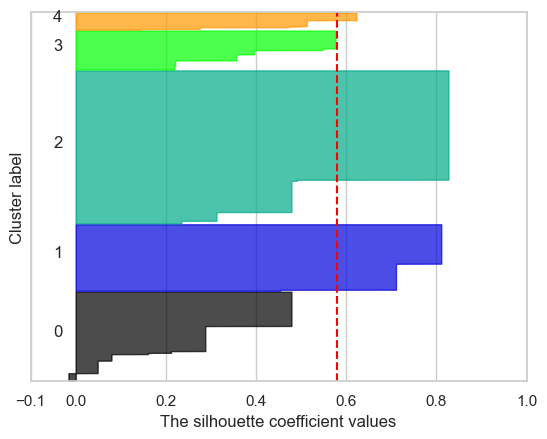

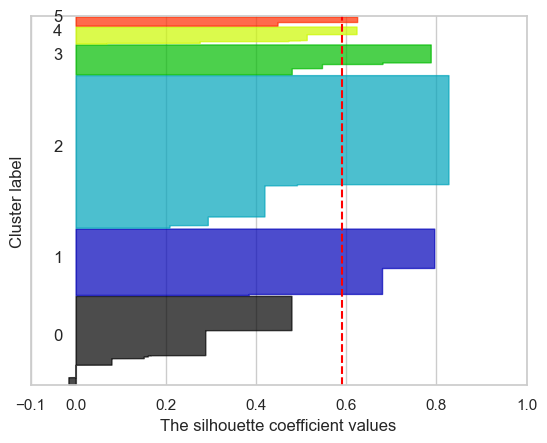

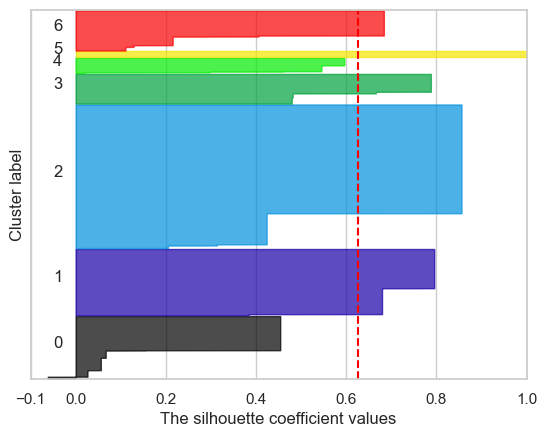

In [3293]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_scaled) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_scaled)

    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [3294]:
from sklearn.metrics import silhouette_score
for j in range(2, 15):
    temp_model = KMeans(n_clusters=j, random_state=10)
    cluster_labels = temp_model.fit_predict(df_scaled)
    silhouette_avg = round(silhouette_score(df_scaled, cluster_labels),3)
    print("For n_clusters =", j, ", The average silhouette_score is =", silhouette_avg)

For n_clusters = 2 , The average silhouette_score is = 0.506
For n_clusters = 3 , The average silhouette_score is = 0.49
For n_clusters = 4 , The average silhouette_score is = 0.54
For n_clusters = 5 , The average silhouette_score is = 0.58
For n_clusters = 6 , The average silhouette_score is = 0.591
For n_clusters = 7 , The average silhouette_score is = 0.625
For n_clusters = 8 , The average silhouette_score is = 0.733
For n_clusters = 9 , The average silhouette_score is = 0.767
For n_clusters = 10 , The average silhouette_score is = 0.806
For n_clusters = 11 , The average silhouette_score is = 0.831
For n_clusters = 12 , The average silhouette_score is = 0.849
For n_clusters = 13 , The average silhouette_score is = 0.861
For n_clusters = 14 , The average silhouette_score is = 0.885


Interpretation- The optimal value of Silhouette Score is at K=3, hence selecting K=3.

#### 7. Building the model

In [3297]:
# Applying cluster model
clusterer = KMeans(n_clusters=3, random_state=10)
cluster_labels = clusterer.fit_predict(df_scaled)
kmc_df['cluster'] = cluster_labels

In [3298]:
cluster_centroid = clusterer.cluster_centers_
cluster_centroid

array([[-0.84193811, -0.28048399, -0.42538084, -0.13400907,  0.20138871,
         1.69886364],
       [-0.87278084,  1.16817236,  1.42300292,  1.358052  , -1.35031388,
         1.51800847],
       [ 1.08790144, -0.38323402, -0.40302032, -0.5919417 ,  0.53662209,
         2.        ]])

#### 8. Visualize clusters for foot vs. number scatter plot

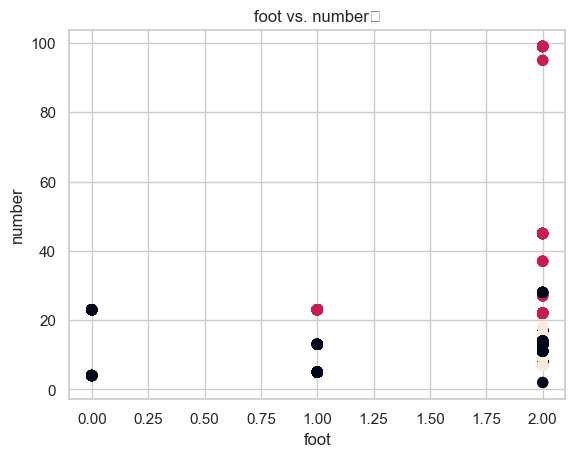

In [3300]:
plt.scatter(kmc_df['foot.enc'], kmc_df['number'], c=clusterer.labels_.astype(float), s=50, alpha=0.7)
plt.title("foot vs. number	")
plt.xlabel('foot')
plt.ylabel('number')
plt.show()

In [3301]:
'''# c) Scatter plots and Distribution plots for all attributes
sns.set_palette("bright")
sns.pairplot(kmc_df, kind="scatter", hue="cluster", corner=True) #corner = true means only Lower diagonal matrix will be displayed
plt.show()

fig, axs = plt.subplots(ncols=len(kmc_df['cluster'].unique()), figsize=(25,6))
for cluster in kmc_df['cluster'].unique():
    print('Cluster Number:', str(cluster))
    temp_df = kmc_df[['number', 'country_of_birth', 'cluster']] [kmc_df['cluster'] == cluster]
    print(temp_df.country_of_birth.unique())
    #temp_df.number.value_counts().plot(kind='barh', ax=axs[cluster])
    axs[cluster].set_title('Cluster number {}'.format(cluster+1))
    print(10* '====')'''

'# c) Scatter plots and Distribution plots for all attributes\nsns.set_palette("bright")\nsns.pairplot(kmc_df, kind="scatter", hue="cluster", corner=True) #corner = true means only Lower diagonal matrix will be displayed\nplt.show()\n\nfig, axs = plt.subplots(ncols=len(kmc_df[\'cluster\'].unique()), figsize=(25,6))\nfor cluster in kmc_df[\'cluster\'].unique():\n    print(\'Cluster Number:\', str(cluster))\n    temp_df = kmc_df[[\'number\', \'country_of_birth\', \'cluster\']] [kmc_df[\'cluster\'] == cluster]\n    print(temp_df.country_of_birth.unique())\n    #temp_df.number.value_counts().plot(kind=\'barh\', ax=axs[cluster])\n    axs[cluster].set_title(\'Cluster number {}\'.format(cluster+1))\n    print(10* \'====\')'

#### 9. Silhouette Score

In [3303]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_scaled, cluster_labels)
print(f"Silhouette Score for KMeans with K=3 is: {silhouette_avg:.2f}")

Silhouette Score for KMeans with K=3 is: 0.49


#### 10. Calinski Harabasz Score

In [3305]:
from sklearn.metrics import calinski_harabasz_score
ch_index = calinski_harabasz_score(df_scaled, cluster_labels)
print("Calinski-Harabasz Index:", ch_index)

Calinski-Harabasz Index: 3022.1461578903045


#### 11. Davies-Bouldin index

In [3307]:
from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(df_scaled, cluster_labels)
print(f"Davies-Bouldin index: {db_score:.2f}")

Davies-Bouldin index: 1.15


#### Interpretation- 

    Silhouette Score for KMeans with k=3: 0.49
    Calinski-Harabasz Index: 3022.14
    Davies-Bouldin index: 1.15

---------------
Silhouette Score (SS): The Silhouette Score measures how well-separated the clusters are. It ranges from -1 to 1, where higher values indicate better-defined clusters. A Silhouette Score of 0.49 for this KMeans model suggests moderate cluster separation.

Calinski-Harabasz Index (CHI): The CHI, also known as the Variance Ratio Criterion, assesses the ratio of between-cluster variance to within-cluster variance. A CHI value of approximately 3022.14 suggests good cluster dispersion relative to within-cluster variance.

Davies-Bouldin Index (DBI): The DBI evaluates the average similarity between each cluster and its most similar cluster. Lower values indicate better clustering. A DBI of 1.15 points to compact and separated clusters.

K-Means Clustering classification model shows good performance for predicting dominant Foot of players.

## Summary

1. Christian Pulisic is the best scorer with 658 goals and 266 assists.
2. Number of minutes_played and assists have very high correlation with goals scored.
3. Top team in home performance is Borussia Dortmund. Top team in away performance is Royal Standard de Liege.
4. Probability that a player scores a goal given that they played at least 60 minutes= 0.41.
5. Joint probability of a player providing an assist and scoring a goal= 0.00.
6. the higher the total number of goals scored per season, the better the final finishing position of the club.
7. Number of goals scored by players peaked at 26 years of age and decreased as per increasing age.
8. Features with the highest correlation values with market_value_in_eur are- away_club_goals, goals, minutes_played, home_club_goals.
9. There is no significant difference in the average home_club_goals and away_club_goals scored.
10. There is significant difference in the average number of goals scored by right foot and left foot.

## Business Conclusions

1. The higher the total number of goals scored per season, the better the final finishing position of the club.
2. The higher the number of goals scored, the higher is the player's market value.
3. Logistic regression model for classifying high and low attendance shows average performance.
4. Logistic regression model for predicting goals scoring shows moderate performance.
5. Young players performed the best meaning player performance decreases significantly with age.
6. Simple linear regression model shows very poor performance in predicting market_value_in_eur based on away_club_goals.
7. Multiple linear regression model demonstrates a clear improvement in market_value_in_eur prediction accuracy but itis still extremely poor model to use for market_value_in_eur prediction.
8. KNN classification model's performance is excellent for attendance assessment in comparison to the logistic regression model.
9. K-Means Clustering classification model shows good performance for predicting dominant foot of players.